<a href="https://colab.research.google.com/github/CEJ-Ezenezi/Global-Mortality-Analysis/blob/main/global_mortality_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GLOBAL MORTALITY ANALYSIS - A COMPREHENSIVE STUDY FROM YEAR 1987 TO 2021**

In [ ]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_data(csv_filename):
    """reads a csv file into a dataframe
    cleans the dataframe, deletes specified columns of the dataframe as the
    information is irrelevant, filters the required years
    and returns the dataframe.
    """

    #read original csv file into pandas dataframe specifying seperator
    #skip first 5 rows due to irrelevance and set index_col to false
    #to handle extra commas in the  dataset
    df = pd.read_csv(csv_filename,  sep=',', skiprows=5, index_col=False)

    #drop irrelevant columns
    df = df.drop(['Region Code', 'Country Name', 'Age group code',
        'Age-standardized death rate per 100 000 standard population'], axis=1)

    #drop rows with nan values
    df = df.dropna()

    #filter years of interest
    df = df[(df['Year'] >= 1987) & (df['Year'] <= 2021)]

    return df



In [ ]:
#calling the read_data function
com_deaths = read_data("/content/drive/MyDrive/Communicable_maternal_perinatal_nutritional_conditions.csv")
com_deaths.head(20)

,Region Name,Country Code,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,Europe,ALB,1987,All,[All],2994.0,17.280388,97.331036
1,Europe,ALB,1987,All,[0],1421.0,57.787719,1763.027295
2,Europe,ALB,1987,All,[1-4],656.0,53.117409,229.370629
3,Europe,ALB,1987,All,[5-9],36.0,17.821782,10.807565
4,Europe,ALB,1987,All,[10-14],21.0,15.555556,6.643467
5,Europe,ALB,1987,All,[15-19],23.0,11.917098,7.409794
6,Europe,ALB,1987,All,[20-24],22.0,8.118081,7.529090
7,Europe,ALB,1987,All,[25-29],28.0,11.715481,9.728978
8,Europe,ALB,1987,All,[30-34],30.0,13.274336,12.310217
9,Europe,ALB,1987,All,[35-39],15.0,7.575758,8.138904


In [ ]:
ill_deaths = read_data('/content/drive/MyDrive/Ill_defined diseases.csv')
ill_deaths.head(20)

,Region Name,Country Code,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
1,Europe,ALB,1987,All,[85+],523.0,23.495058,5230.000000
2,Europe,ALB,1987,All,[80-84],296.0,18.059793,1783.132530
3,Europe,ALB,1987,All,[75-79],287.0,13.569740,931.818182
4,Europe,ALB,1987,All,[70-74],199.0,11.018826,487.745098
5,Europe,ALB,1987,All,[65-69],131.0,9.472162,202.472952
6,Europe,ALB,1987,All,[60-64],91.0,8.593012,117.571059
7,Europe,ALB,1987,All,[55-59],64.0,7.891492,64.516129
8,Europe,ALB,1987,All,[50-54],45.0,8.771930,37.406484
9,Europe,ALB,1987,All,[45-49],63.0,15.989848,44.366197
10,Europe,ALB,1987,All,[40-44],29.0,13.063063,20.684736


In [ ]:
injuries_deaths = read_data("/content/drive/MyDrive/Injuries.csv")
injuries_deaths.head()

,Region Name,Country Code,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
1,Europe,ALB,1987,All,[85+],10.0,0.449236,100.000000
2,Europe,ALB,1987,All,[80-84],2.0,0.122026,12.048193
3,Europe,ALB,1987,All,[75-79],13.0,0.614657,42.207792
4,Europe,ALB,1987,All,[70-74],17.0,0.941307,41.666667
5,Europe,ALB,1987,All,[65-69],17.0,1.229212,26.275116


In [ ]:
noncom_deaths = read_data("/content/drive/MyDrive/Noncommunicable diseases.csv")
noncom_deaths.head()

,Region Name,Country Code,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
1,Europe,ALB,1987,All,[85+],1522.0,68.373765,15220.000000
2,Europe,ALB,1987,Male,[All],5981.0,62.069323,377.540715
3,Europe,ALB,1987,Male,[20-24],47.0,25.683060,31.125828
4,Europe,ALB,1987,Male,[25-29],53.0,37.857143,35.690236
5,Europe,ALB,1987,Male,[30-34],56.0,41.791045,44.515103


Let's then carry out some summary statistics on the four different dataframes

let's merge the four dataframes into one for efficiency

In [ ]:
#merge on common columns
common_cols = ['Region Name', 'Country Code', 'Year', 'Sex', 'Age Group']

# Perform successive merges
merged_df = pd.merge(com_deaths, ill_deaths, on=common_cols, suffixes=('_com', '_ill'))
merged_df = pd.merge(merged_df, injuries_deaths, on=common_cols, suffixes=('', '_inj'))
merged_deaths_df = pd.merge(merged_df, noncom_deaths, on=common_cols, suffixes=('', '_noncom'))

merged_deaths_df.head()

,Region Name,Country Code,Year,Sex,Age Group,Number_com,Percentage of cause-specific deaths out of total deaths_com,Death rate per 100 000 population_com,Number_ill,Percentage of cause-specific deaths out of total deaths_ill,Death rate per 100 000 population_ill,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,Number_noncom,Percentage of cause-specific deaths out of total deaths_noncom,Death rate per 100 000 population_noncom
0,Europe,ALB,1987,All,[All],2994.0,17.280388,97.331036,2913.0,16.812882,94.697832,736.0,4.247951,23.926400,10683.0,61.658779,347.290400
1,Europe,ALB,1987,All,[0],1421.0,57.787719,1763.027295,627.0,25.498170,777.915633,41.0,1.667344,50.868486,370.0,15.046767,459.057072
2,Europe,ALB,1987,All,[1-4],656.0,53.117409,229.370629,247.0,20.000000,86.363636,77.0,6.234818,26.923077,255.0,20.647773,89.160839
3,Europe,ALB,1987,All,[5-9],36.0,17.821782,10.807565,71.0,35.148515,21.314920,44.0,21.782178,13.209246,51.0,25.247525,15.310718
4,Europe,ALB,1987,All,[10-14],21.0,15.555556,6.643467,45.0,33.333333,14.236001,34.0,25.185185,10.756090,35.0,25.925926,11.072445


In [ ]:
merged_deaths_df.describe()

,Year,Number_com,Percentage of cause-specific deaths out of total deaths_com,Death rate per 100 000 population_com,Number_ill,Percentage of cause-specific deaths out of total deaths_ill,Death rate per 100 000 population_ill,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,Number_noncom,Percentage of cause-specific deaths out of total deaths_noncom,Death rate per 100 000 population_noncom
count,184039.000000,184039.000000,184039.000000,184039.000000,184039.000000,184039.000000,184039.000000,184039.00000,184039.000000,184039.000000,1.840390e+05,184039.000000,184039.000000
mean,2004.326137,1088.627400,11.332250,186.954721,652.837138,5.161307,166.388695,996.30869,20.156154,81.700485,9.843482e+03,63.202427,1707.243915
std,9.591524,6711.744231,14.872756,509.317874,4384.662589,7.466844,737.739817,6516.83985,21.268214,133.274336,5.816124e+04,24.578846,3517.179830
min,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1996.000000,8.000000,2.992958,5.202570,2.000000,0.744048,1.391779,16.00000,3.233555,17.459187,5.900000e+01,42.806429,29.240873
50%,2005.000000,49.000000,6.153846,26.807930,20.000000,2.680637,8.385744,89.00000,10.536806,43.425492,4.360000e+02,67.761194,244.318182
75%,2012.000000,298.000000,12.727273,112.083274,132.000000,6.666667,45.066892,377.00000,33.333333,95.742390,2.972000e+03,85.555556,1338.243544
max,2021.000000,560993.000000,100.000000,9998.846287,180870.000000,100.000000,24675.324675,368365.00000,100.000000,12376.237624,2.658375e+06,100.000000,50000.000000


*Let's carry out a trend analysis on the death rates across the regions of the world*

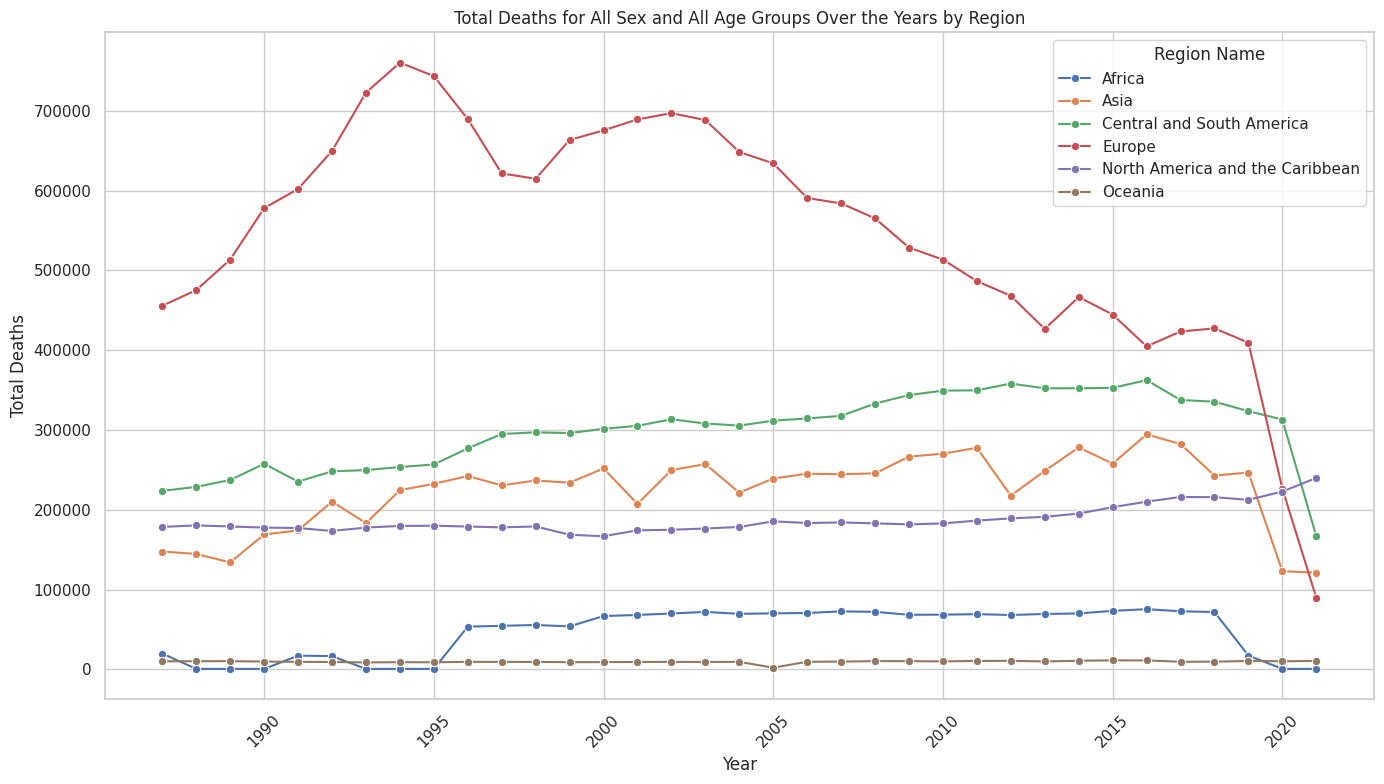

In [ ]:
# Filter rows where Sex is "All" and Age group is "Age_all"
filtered_data = merged_deaths_df[(merged_deaths_df['Sex'] == 'All') & (merged_deaths_df['Age Group'] == '[All]')]

# Group by Region Name and Year, then sum the Number of deaths
grouped_data = filtered_data.groupby(['Region Name', 'Year'])['Number'].sum().reset_index()

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='Number', hue='Region Name', marker='o')

# Customize the plot
plt.title('Total Deaths for All Sex and All Age Groups Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Region Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

we see from the trend above that there were more deaths in the Europe region, followed by Central and southern America, with Oceania region being the least recording region with an awkward steady line over the years, this may be as a result of the low number of population in that region.
Let's further investigate the Eurpe region to see countries contributing most to the total number of deaths in that region.

<ipython-input-35-e7437eca4d86>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_deaths, y='Country Code', x='Number', palette='viridis')


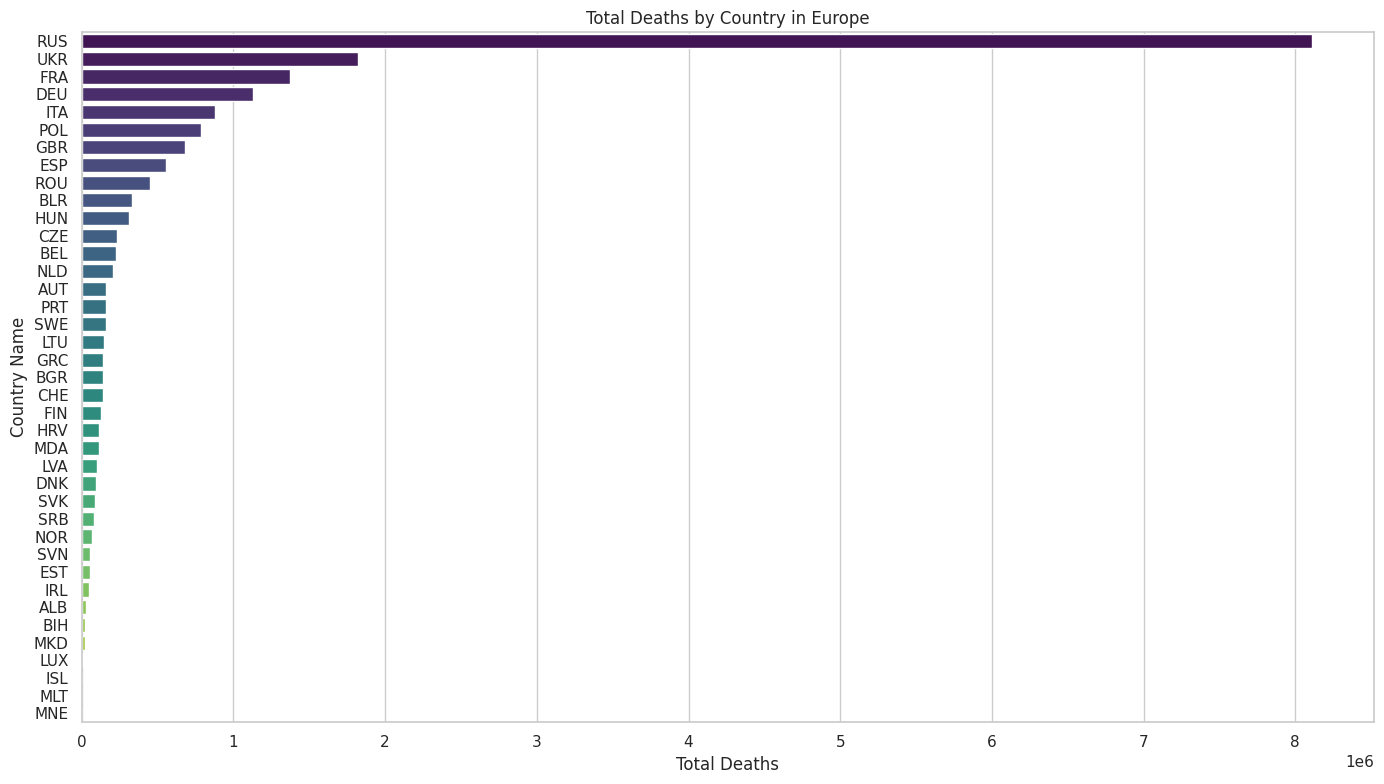

In [ ]:

# Filter the merged data for the Europe region
europe_deaths_data = filtered_data[filtered_data['Region Name'] == 'Europe']

# Group by Country Code and sum the number of deaths
country_deaths = europe_deaths_data.groupby('Country Code')['Number'].sum().reset_index()

# Sort the data to highlight the most affected country
country_deaths = country_deaths.sort_values(by='Number', ascending=False)

sns.set(style="whitegrid")

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=country_deaths, y='Country Code', x='Number', hue='Cóuntry Code' palette='viridis', legend=False)

# Customize the plot
plt.title('Total Deaths by Country in Europe')
plt.xlabel('Total Deaths')
plt.ylabel('Country Name')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-37-bd784b917608>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_deaths, y='Country Code', x='Number_noncom', palette='viridis')


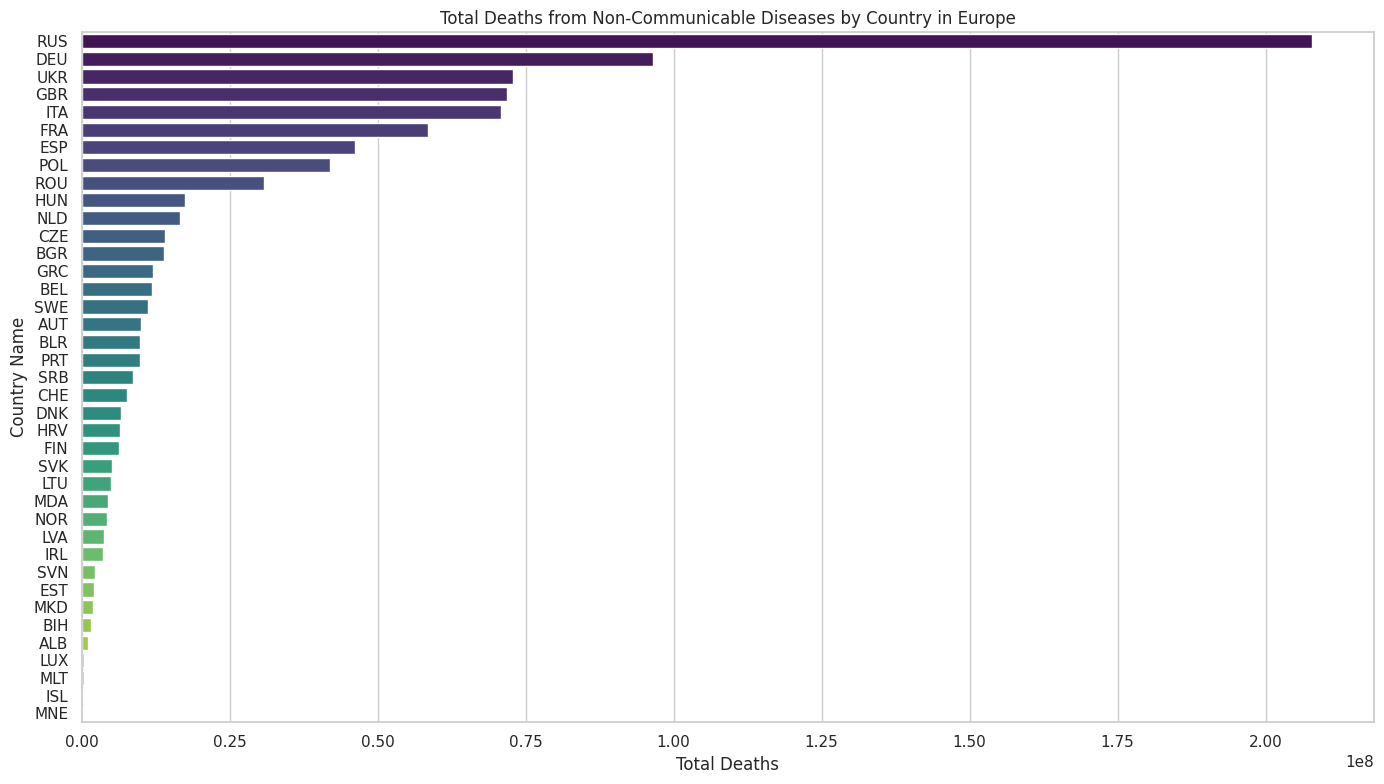

In [ ]:

# Filter the merged data for the Europe region
europe_deaths_data = merged_deaths_df[merged_deaths_df['Region Name'] == 'Europe']

# Group by Country Name and sum the number of deaths
country_deaths = europe_deaths_data.groupby('Country Code')['Number_noncom'].sum().reset_index()

# Sort the data to highlight the most affected country
country_deaths = country_deaths.sort_values(by='Number_noncom', ascending=False)

# Set the plot style
sns.set(style="whitegrid")

# Create the horizontal bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=country_deaths, y='Country Code', x='Number_noncom', palette='viridis')

# Customize the plot
plt.title('Total Deaths from Non-Communicable Diseases by Country in Europe')
plt.xlabel('Total Deaths')
plt.ylabel('Country Name')
plt.tight_layout()

# Show the plot
plt.show()


*Now let's analyse the deaths in each region by the four cause of death groups*

In [ ]:
# Summarize the data by year and region for each health condition
summary_df = merged_deaths_df.groupby(['Year', 'Region Name']).agg({
    'Death rate per 100 000 population_com': 'sum',
    'Death rate per 100 000 population_ill': 'sum',
    'Death rate per 100 000 population': 'sum',
    'Death rate per 100 000 population_noncom': 'sum'
}).reset_index()

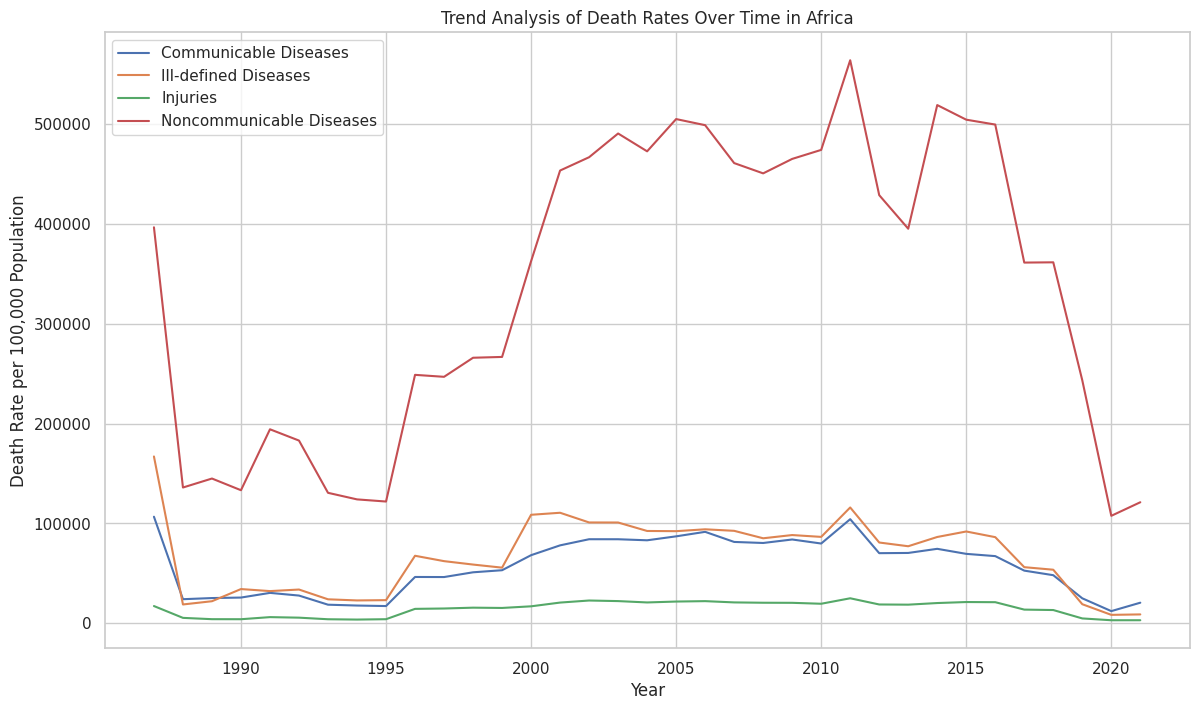

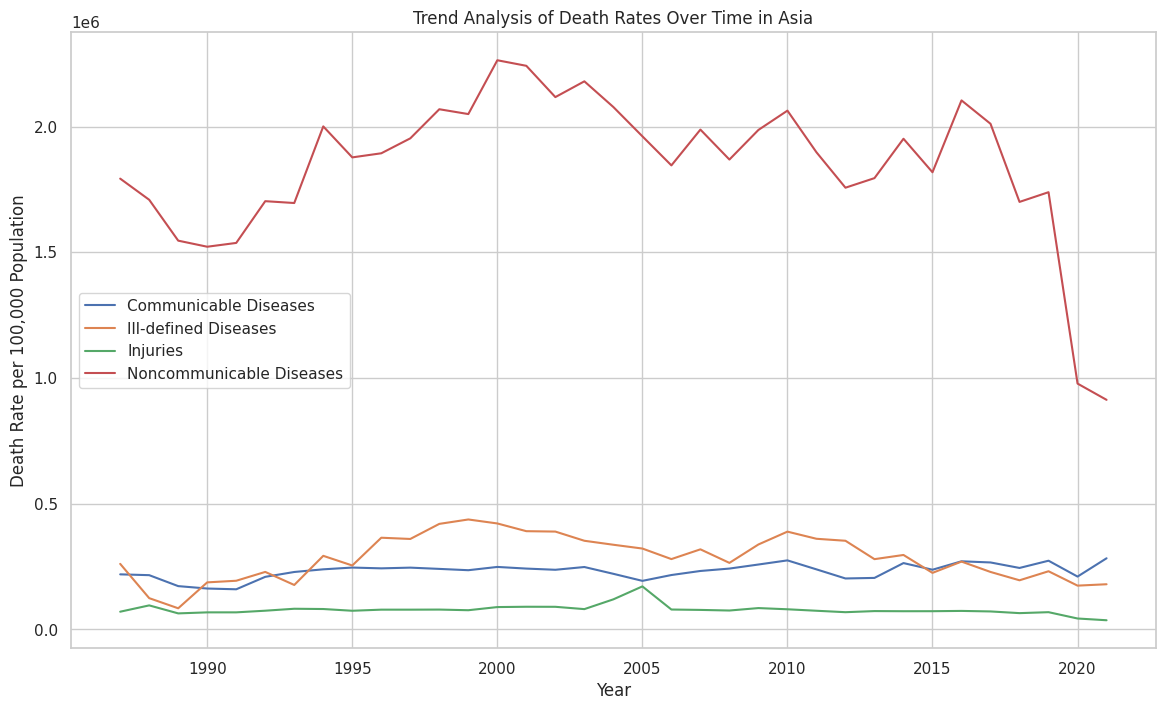

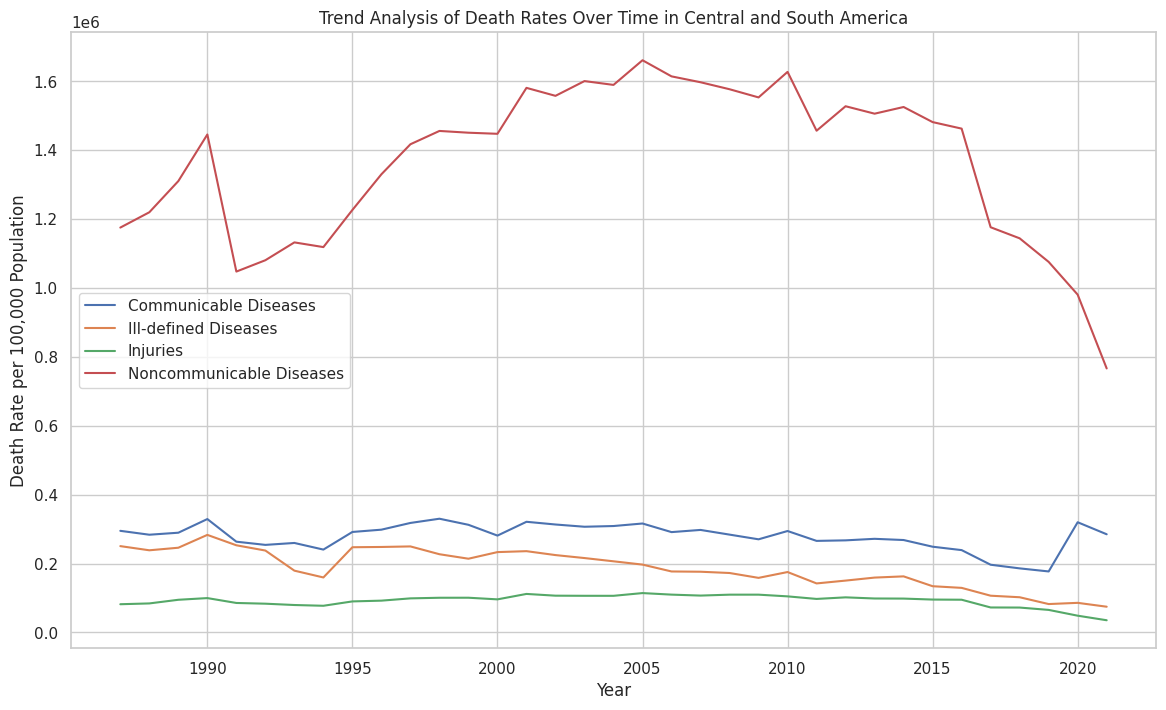

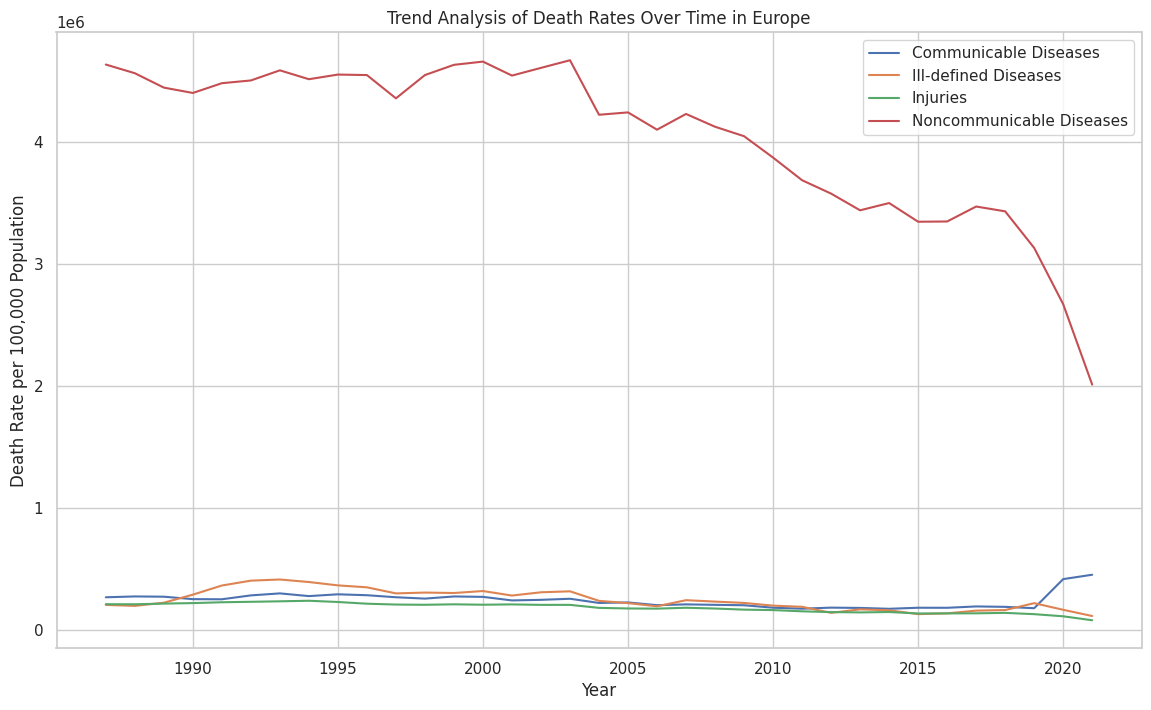

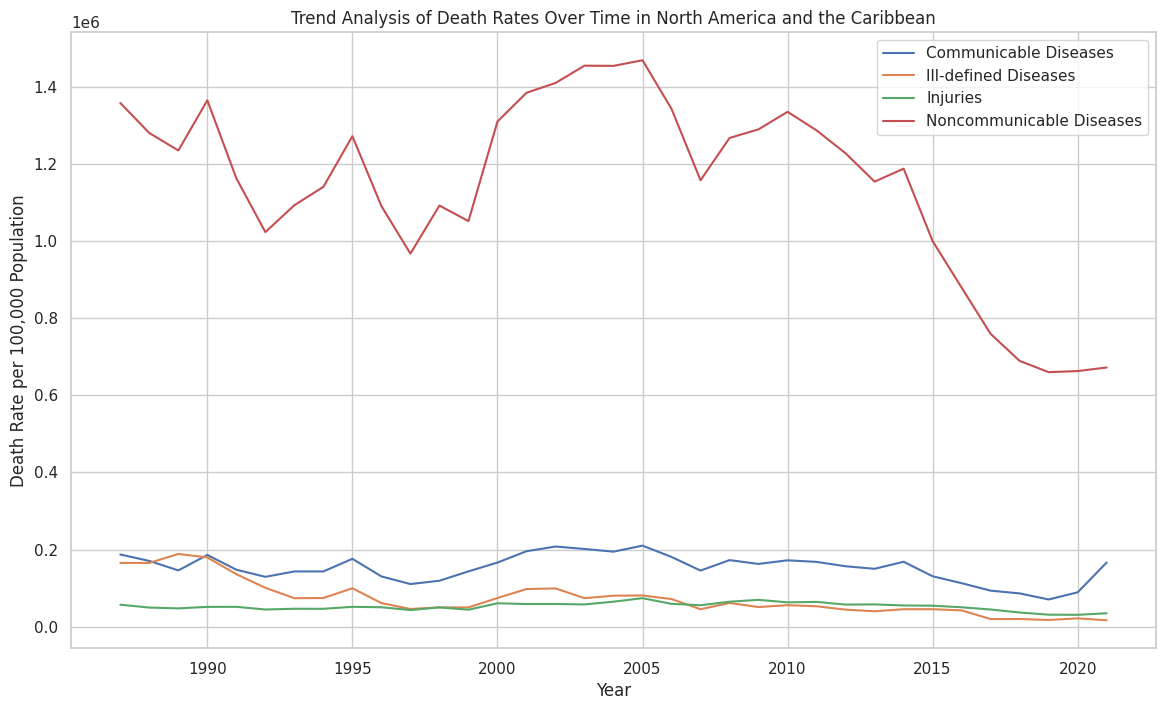

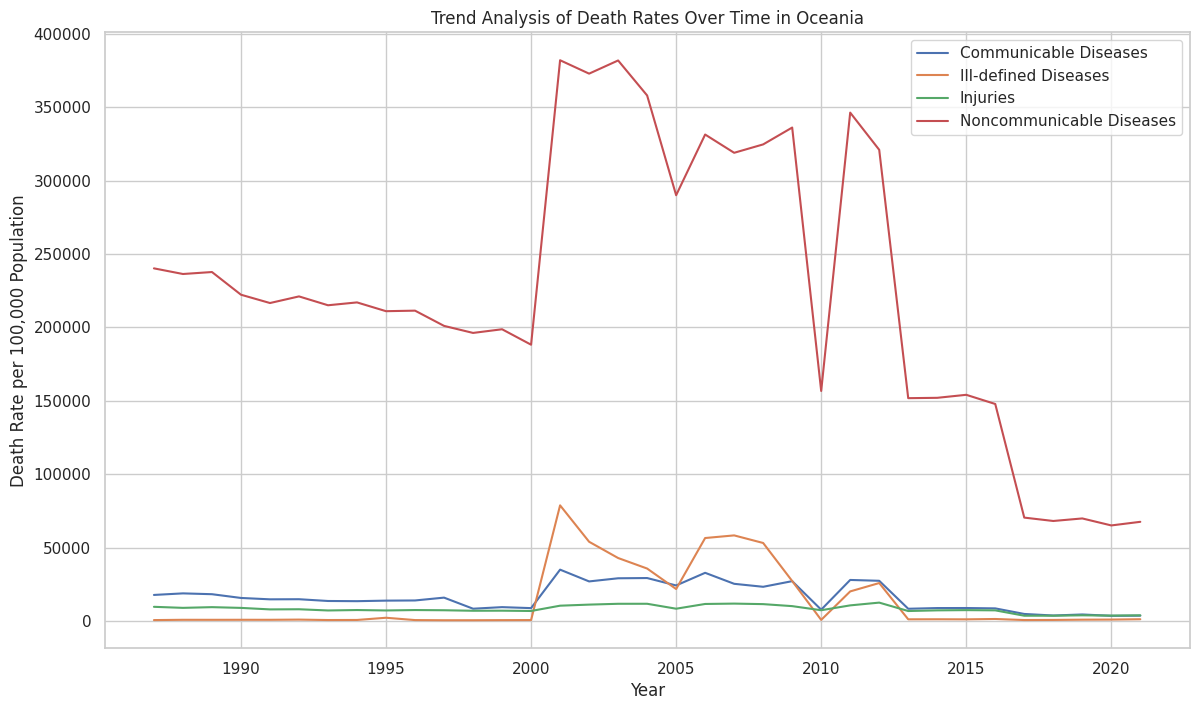

In [ ]:
def plot_trends(data, region):
    plt.figure(figsize=(14, 8))

    plt.plot(data['Year'], data['Death rate per 100 000 population_com'], label='Communicable Diseases')
    plt.plot(data['Year'], data['Death rate per 100 000 population_ill'], label='Ill-defined Diseases')
    plt.plot(data['Year'], data['Death rate per 100 000 population'], label='Injuries')
    plt.plot(data['Year'], data['Death rate per 100 000 population_noncom'], label='Noncommunicable Diseases')

    plt.title(f'Trend Analysis of Death Rates Over Time in {region}')
    plt.xlabel('Year')
    plt.ylabel('Death Rate per 100,000 Population')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot trends for each region
regions = summary_df['Region Name'].unique()

for region in regions:
    region_data = summary_df[summary_df['Region Name'] == region]
    plot_trends(region_data, region)

from the above trends we see that non-communicable diseases group happen to be a major cause of death in all regions.

In [ ]:
# Calculate the total deaths for each age group and sex
merged_deaths_df['Total Deaths'] = merged_deaths_df[['Number_com', 'Number_ill', 'Number', 'Number_noncom']].sum(axis=1)

# Calculate the percentage of deaths for each condition by age group and sex
merged_deaths_df['Percentage_com'] = (merged_deaths_df['Number_com'] / merged_deaths_df['Total Deaths']) * 100
merged_deaths_df['Percentage_ill'] = (merged_deaths_df['Number_ill'] / merged_deaths_df['Total Deaths']) * 100
merged_deaths_df['Percentage_injuries'] = (merged_deaths_df['Number'] / merged_deaths_df['Total Deaths']) * 100
merged_deaths_df['Percentage_noncom'] = (merged_deaths_df['Number_noncom'] / merged_deaths_df['Total Deaths']) * 100

print(merged_deaths_df[['Age Group', 'Sex', 'Percentage_com', 'Percentage_ill', 'Percentage_injuries', 'Percentage_noncom']].head())


   Age Group     Sex  Percentage_com  Percentage_ill  Percentage_injuries  \
0      [All]     All       17.280388       16.812882             4.247951   
1        [0]     All       57.787719       25.498170             1.667344   
2      [1-4]     All       53.117409       20.000000             6.234818   
3      [5-9]     All       17.821782       35.148515            21.782178   
4    [10-14]     All       15.555556       33.333333            25.185185   
5    [15-19]     All       11.917098       20.725389            34.196891   
6    [20-24]     All        8.118081       22.509225            38.376384   
7    [25-29]     All       11.715481       17.154812            26.778243   
8    [30-34]     All       13.274336       10.619469            26.991150   
9    [35-39]     All        7.575758       14.646465            18.181818   
10   [40-44]     All        7.657658       13.063063            16.216216   
11   [45-49]     All        5.329949       15.989848            10.152284   

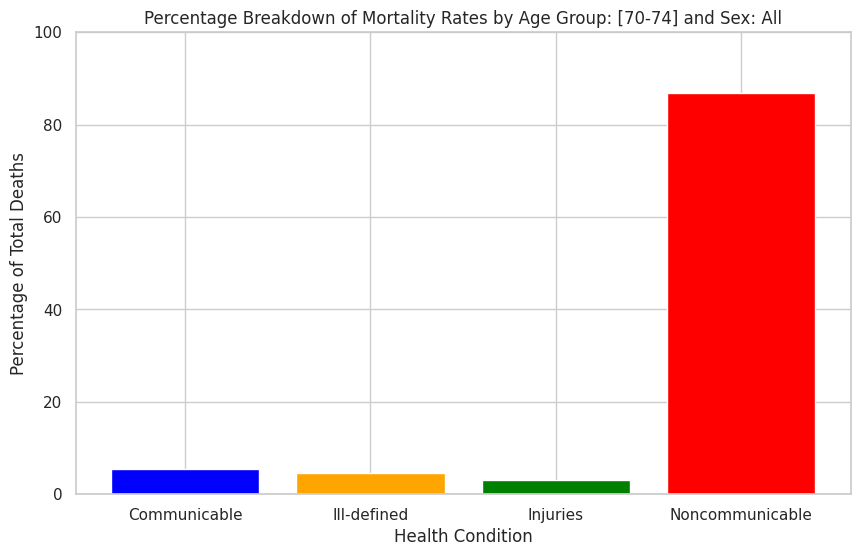

In [ ]:
# Set the plotting style
sns.set(style="whitegrid")

# Function to plot percentage breakdown by age group and sex
def plot_percentage_breakdown(df, age_group, sex):
    data = df[(df['Age Group'] == age_group) & (df['Sex'] == sex)]
    conditions = ['Percentage_com', 'Percentage_ill', 'Percentage_injuries', 'Percentage_noncom']
    # Calculate the mean for each condition to get a single value for each category
    percentages = data[conditions].mean().values
    labels = ['Communicable', 'Ill-defined', 'Injuries', 'Noncommunicable']

    plt.figure(figsize=(10, 6))
    plt.bar(labels, percentages, color=['blue', 'orange', 'green', 'red'])
    plt.title(f'Percentage Breakdown of Mortality Rates by Age Group: {age_group} and Sex: {sex}')
    plt.xlabel('Health Condition')
    plt.ylabel('Percentage of Total Deaths')
    plt.ylim(0, 100)
    plt.show()


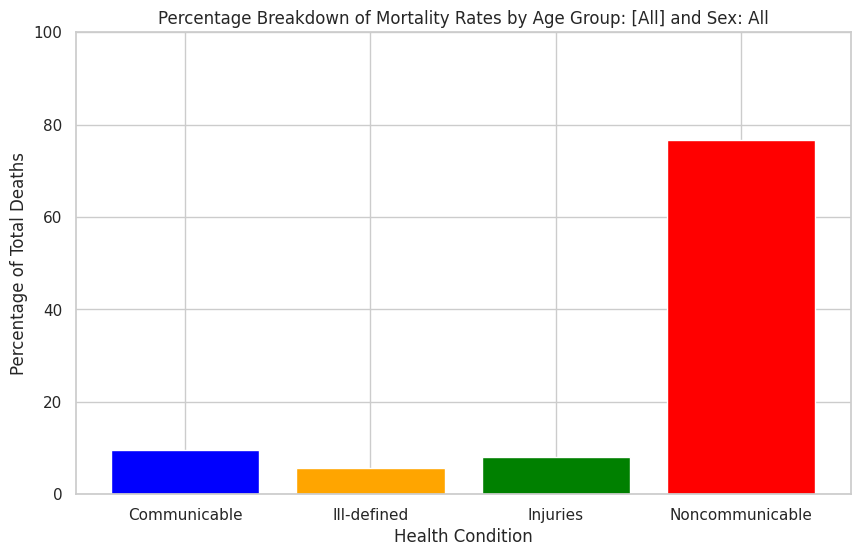

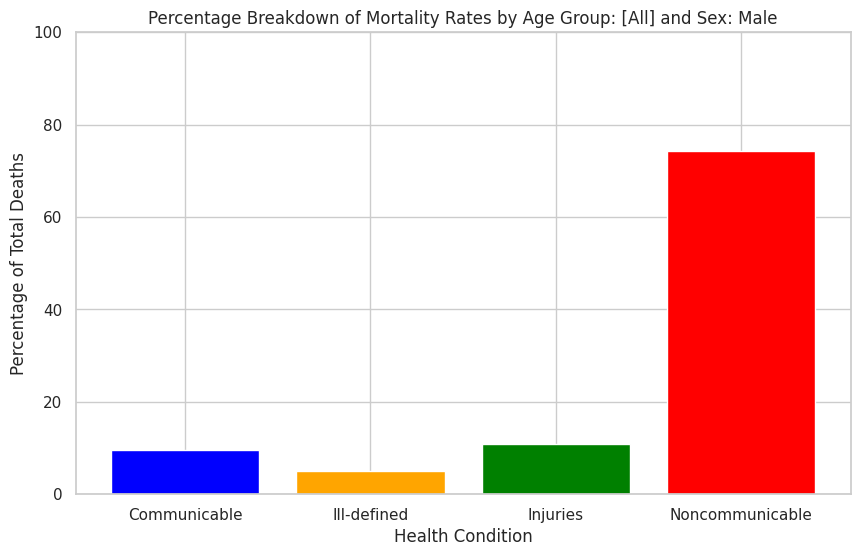

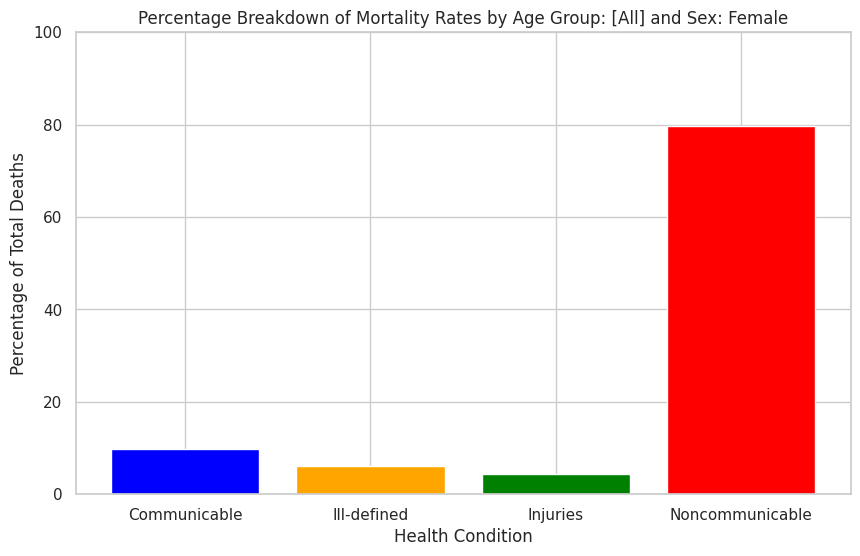

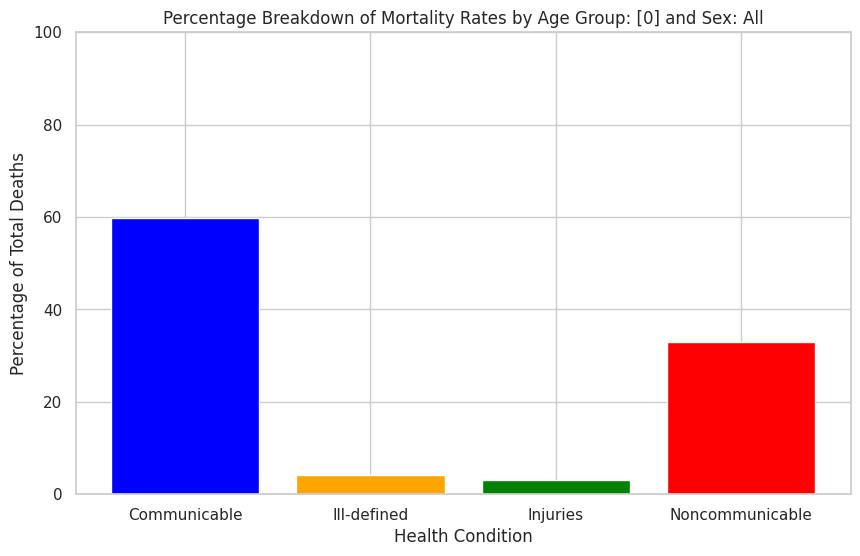

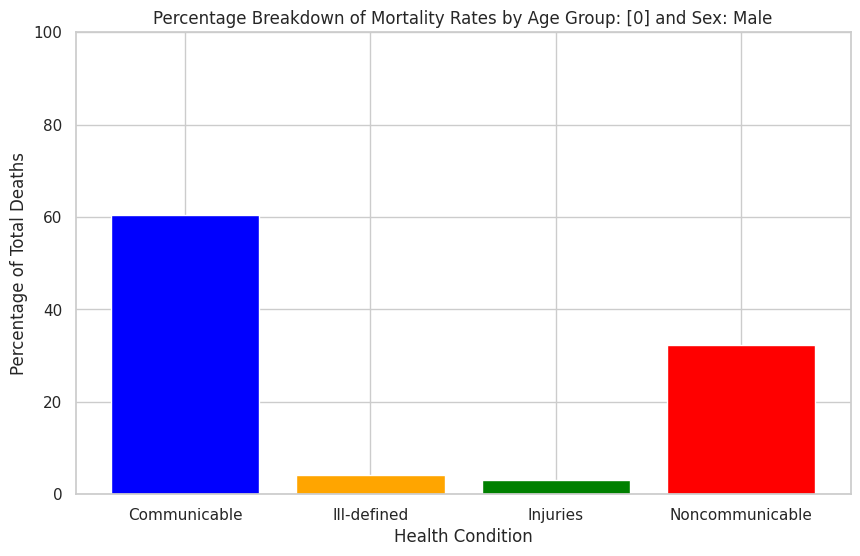

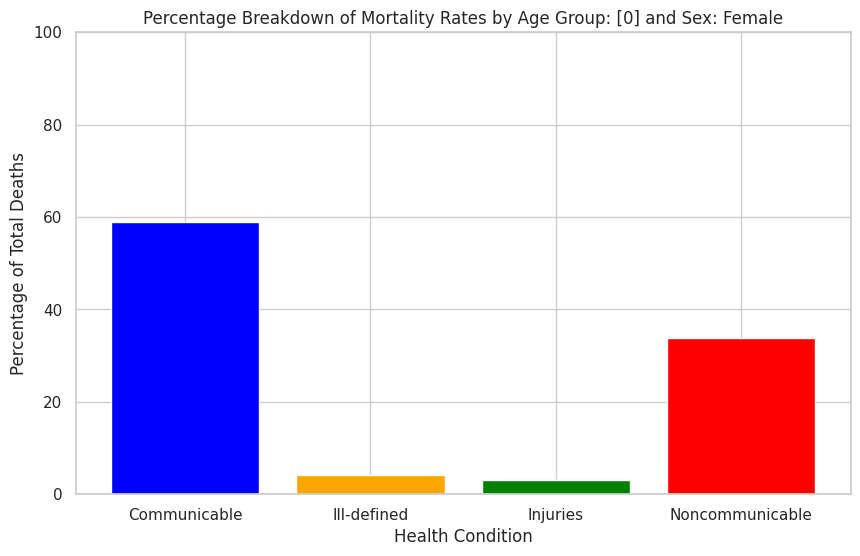

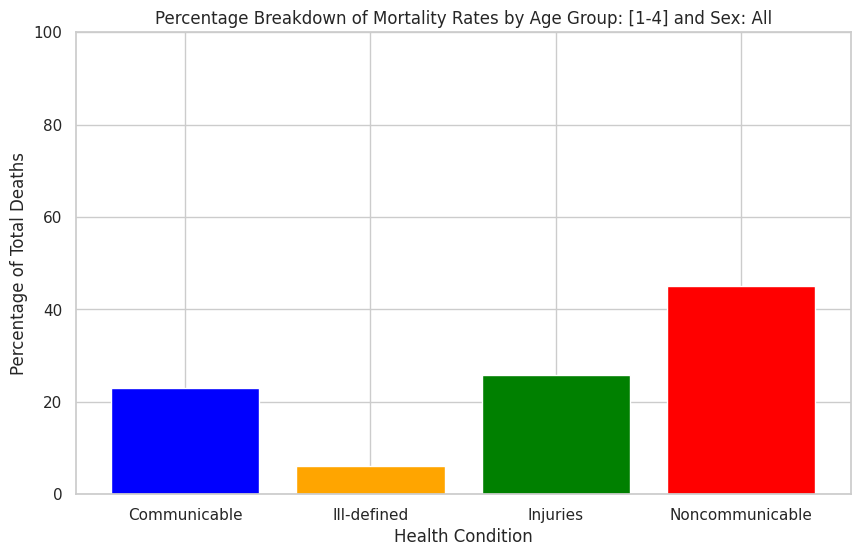

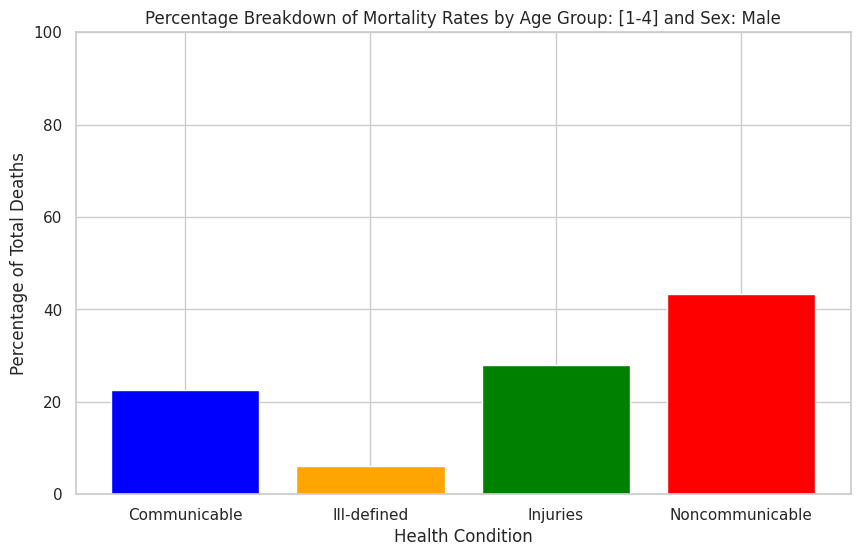

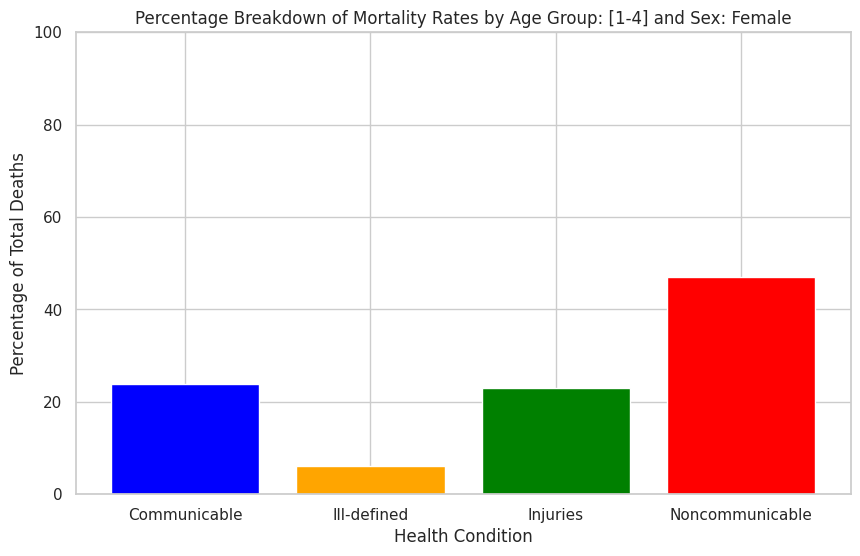

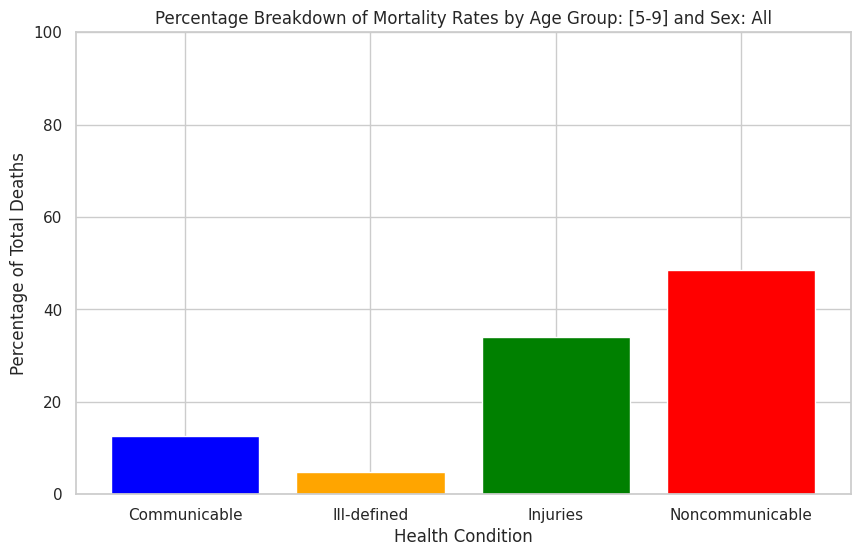

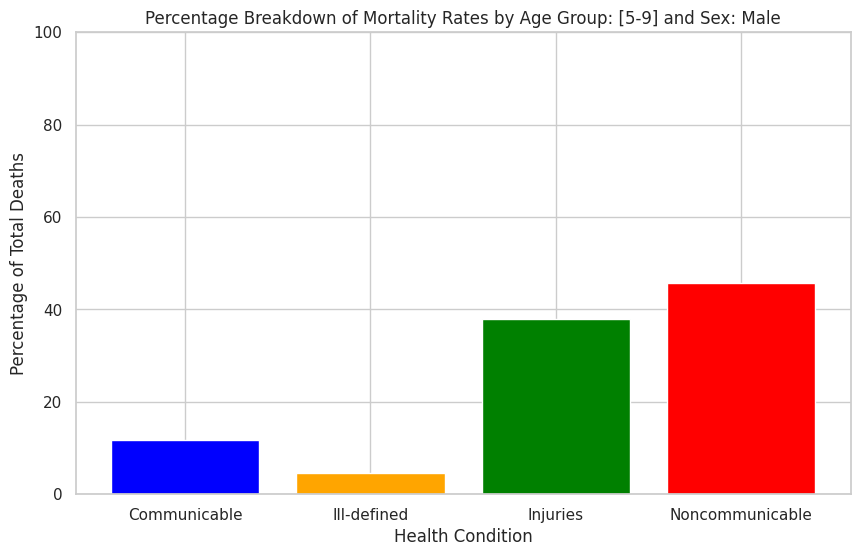

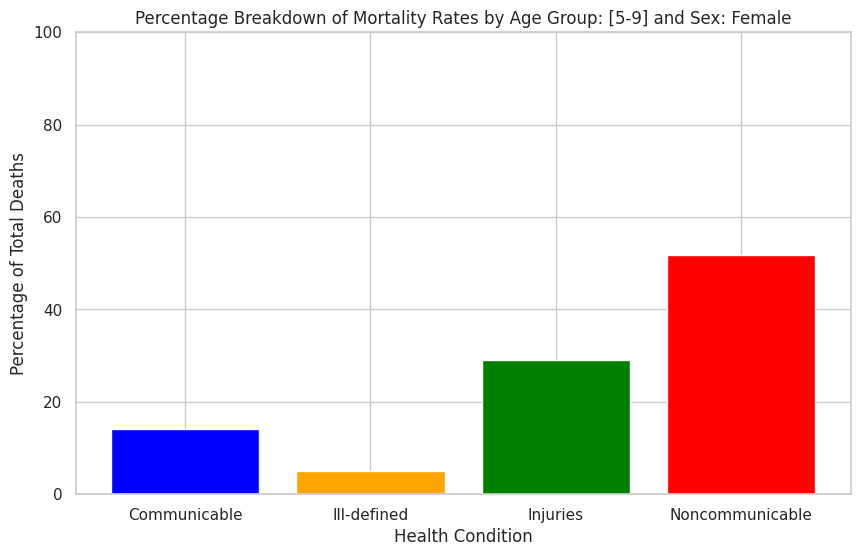

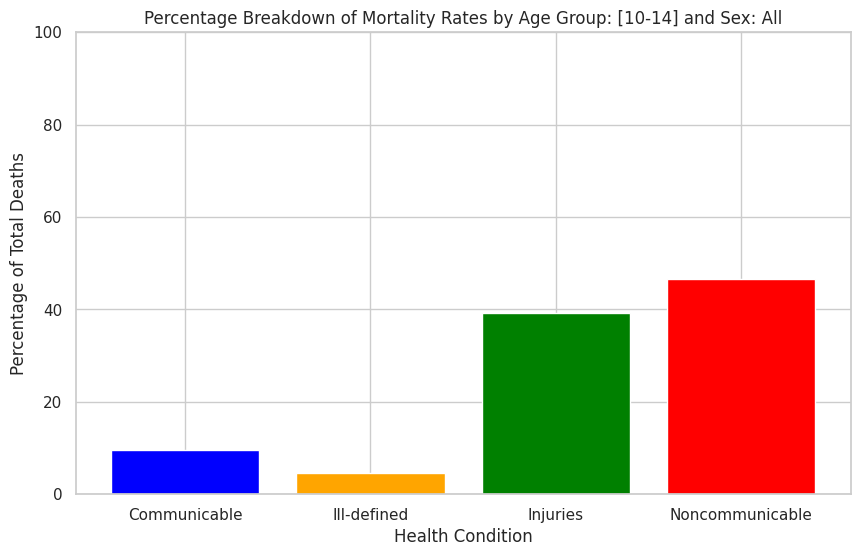

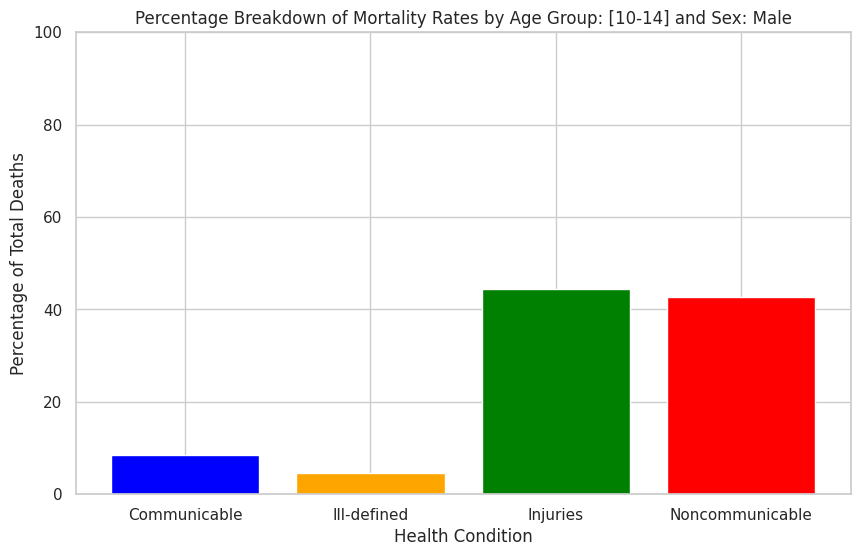

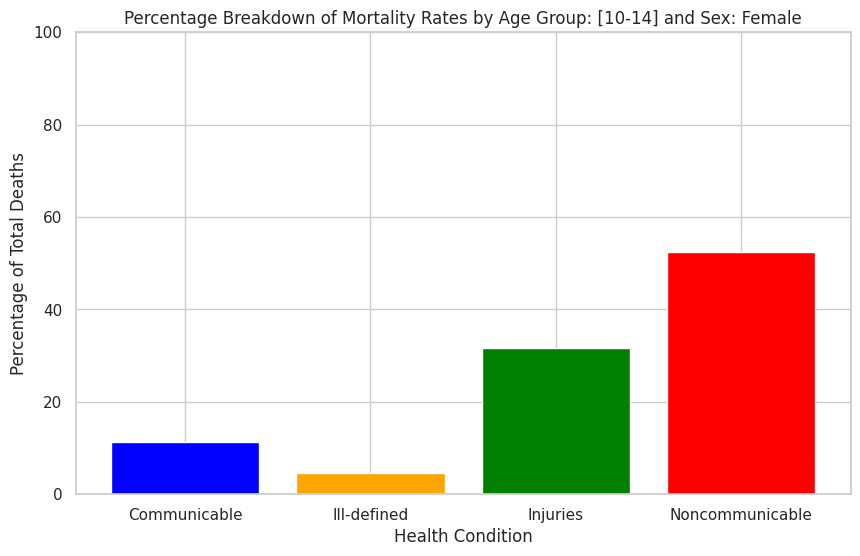

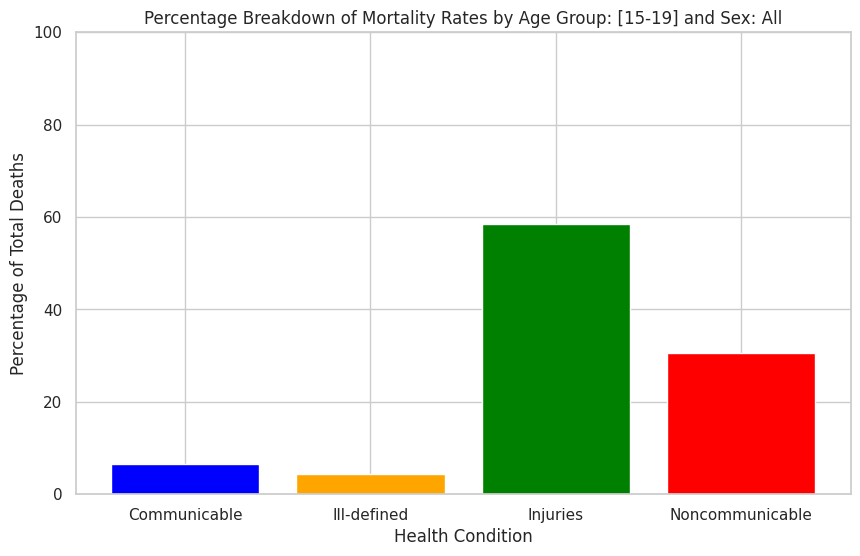

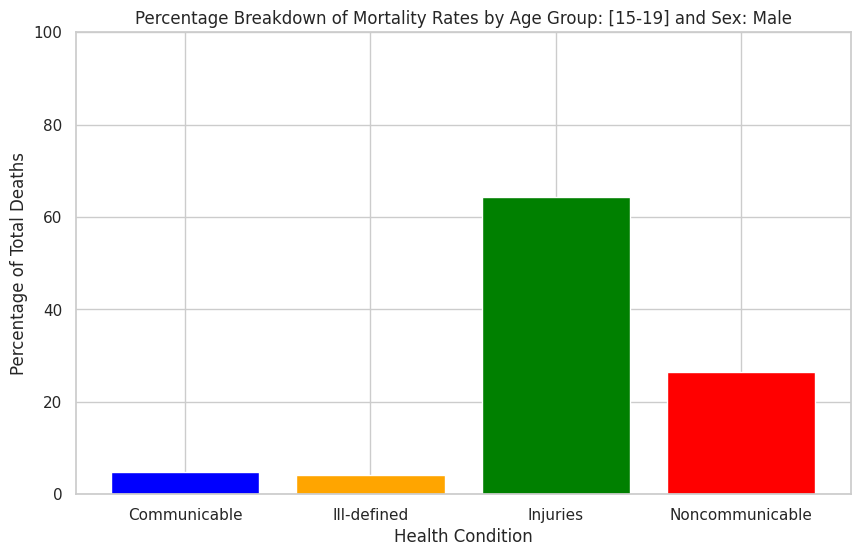

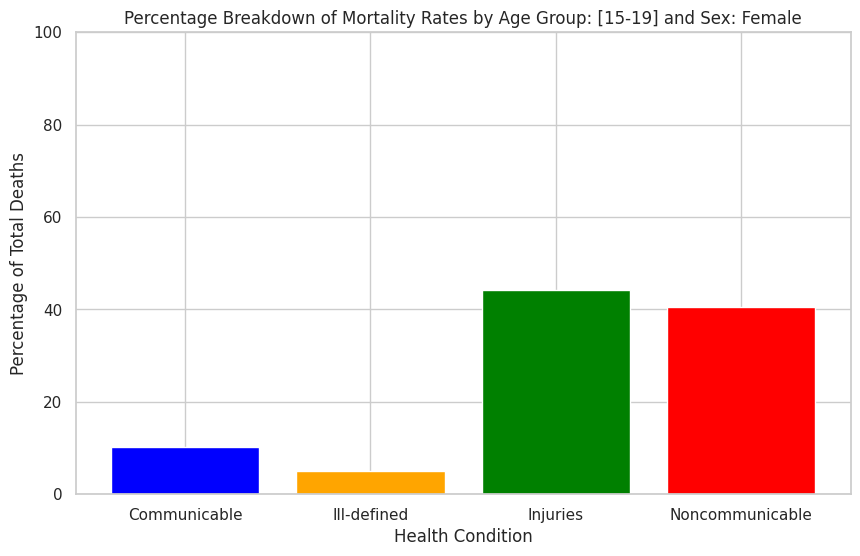

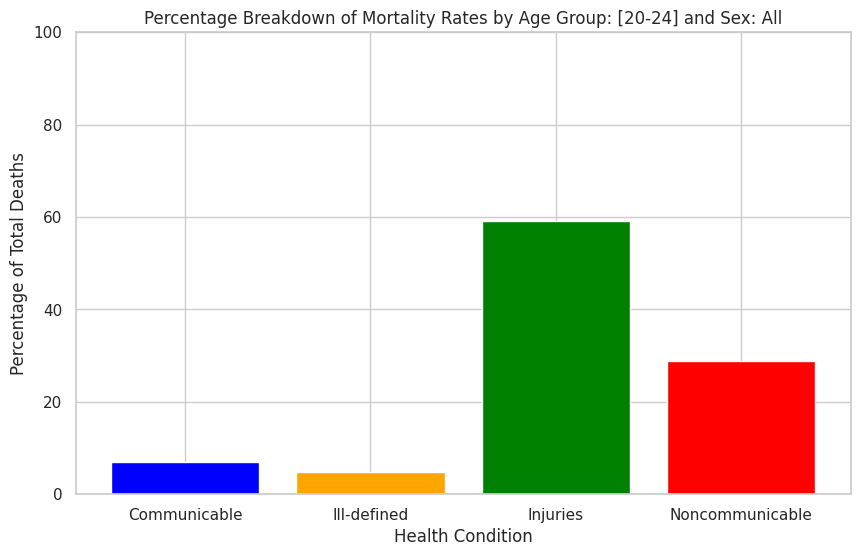

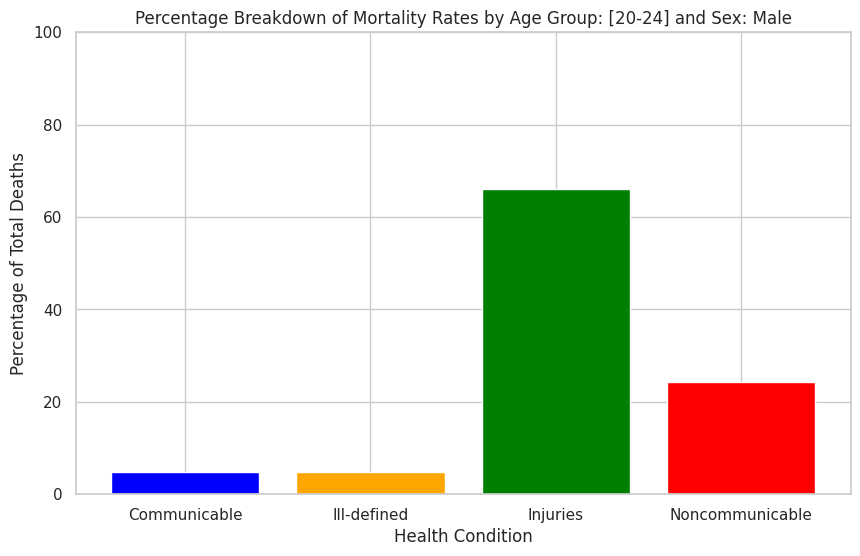

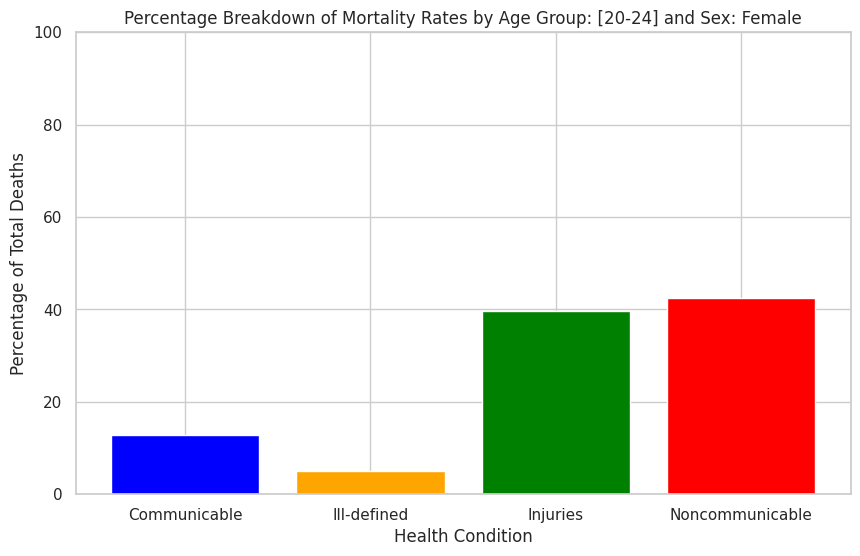

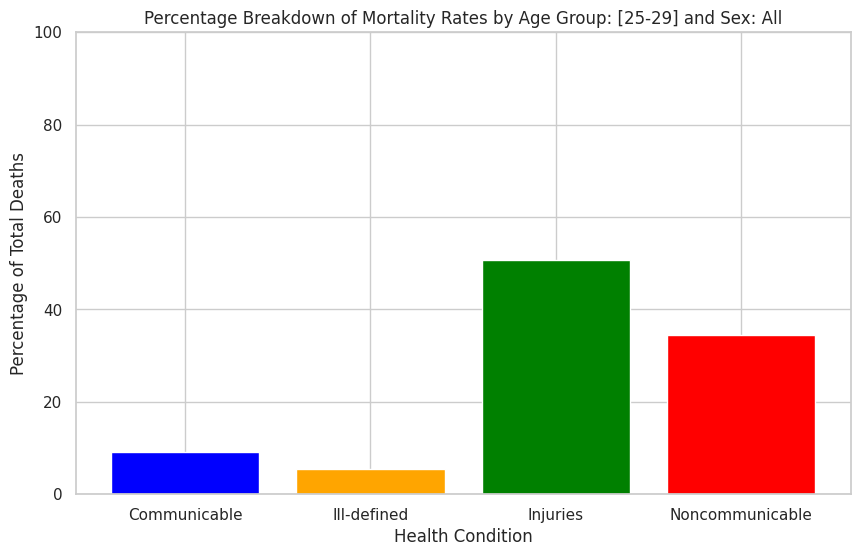

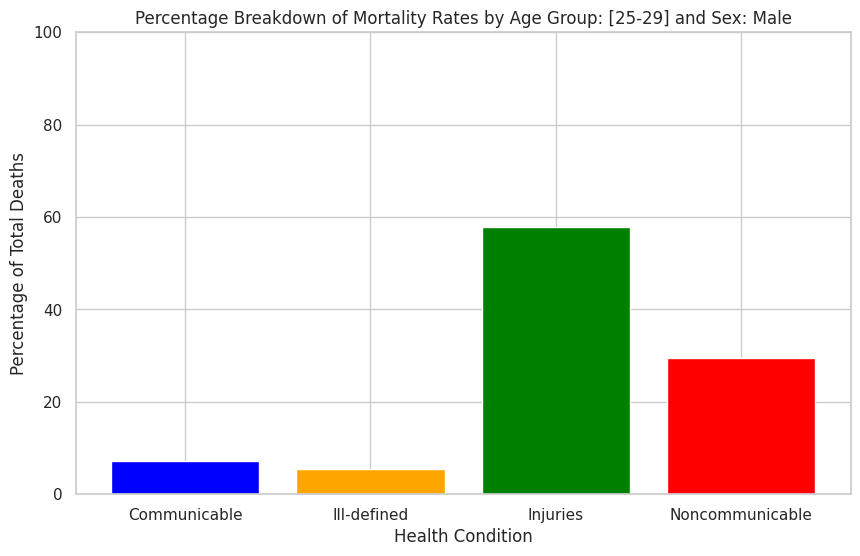

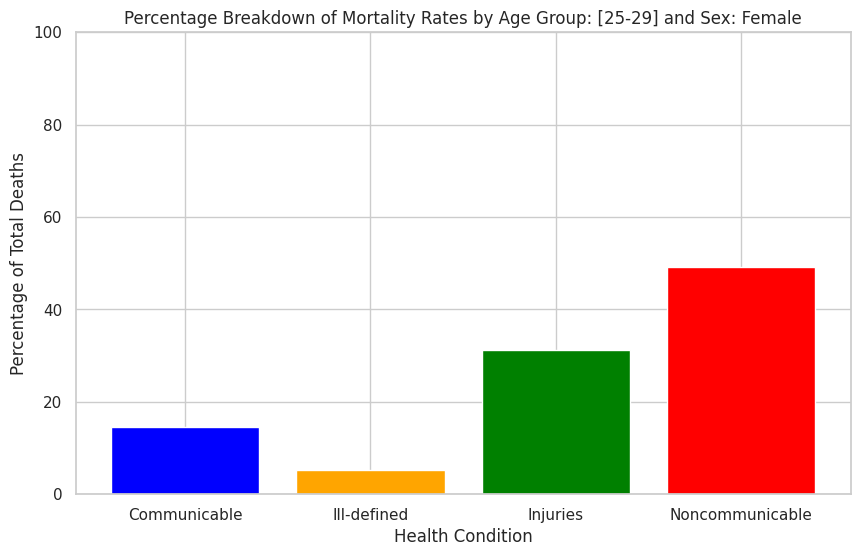

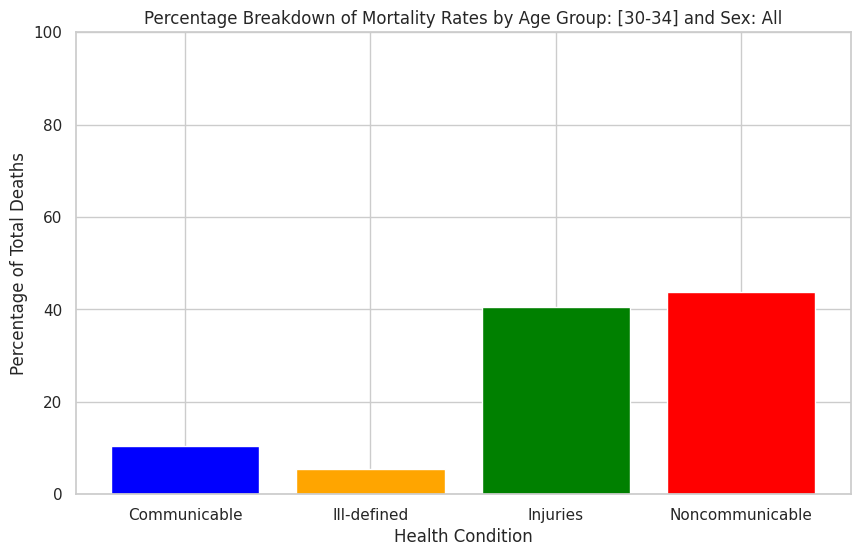

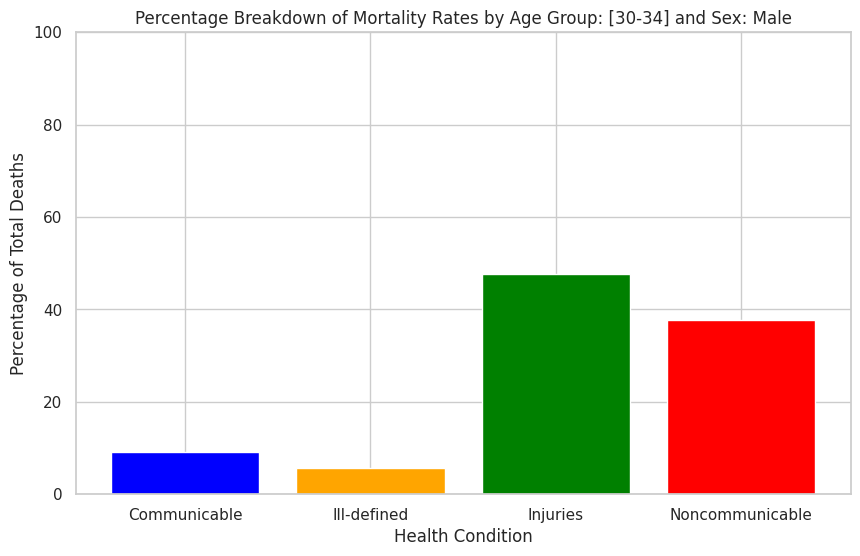

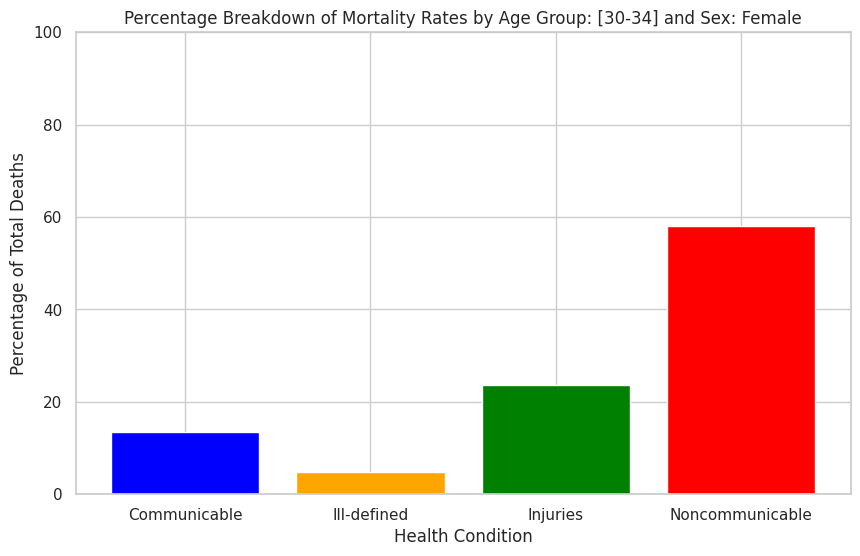

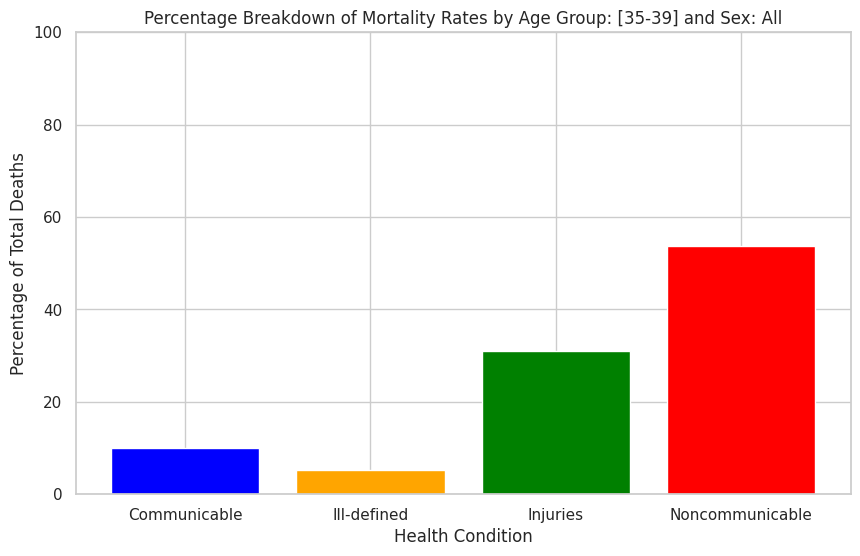

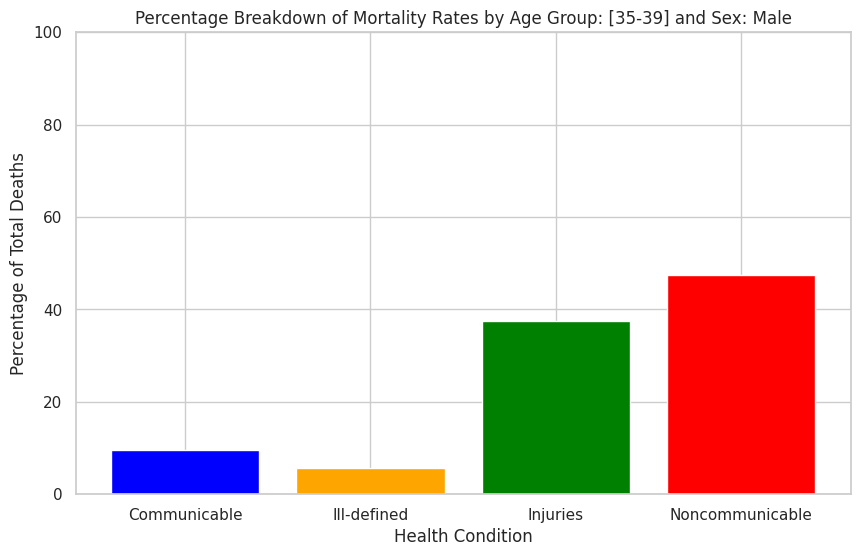

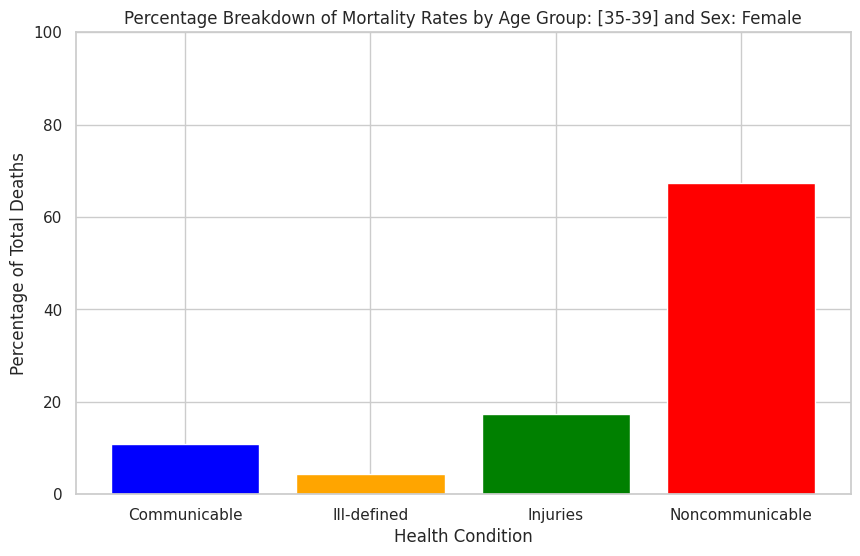

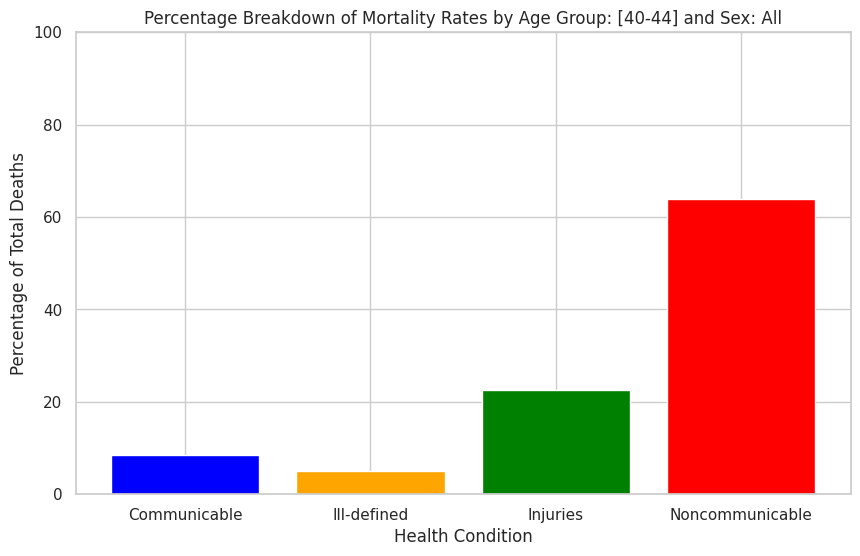

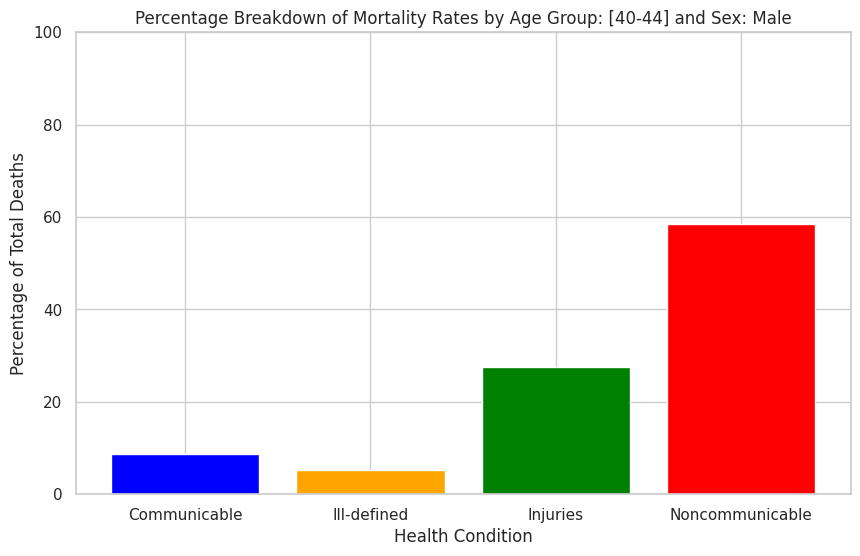

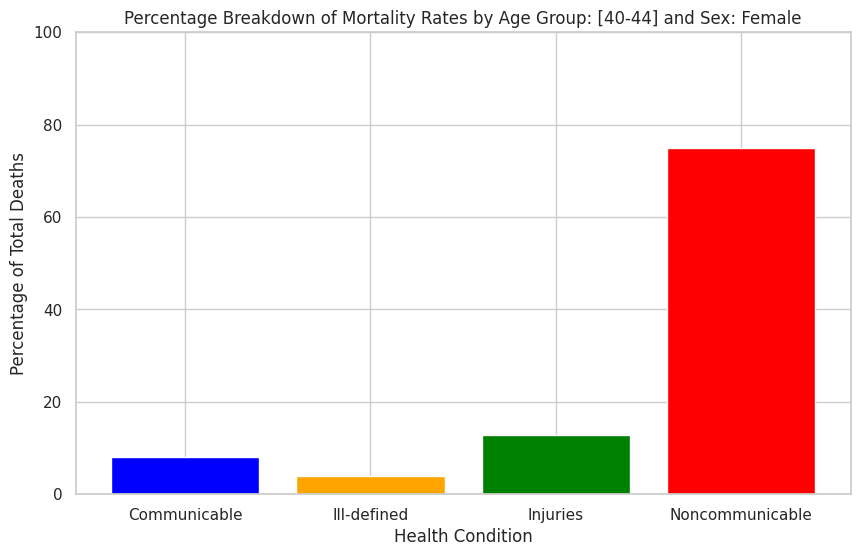

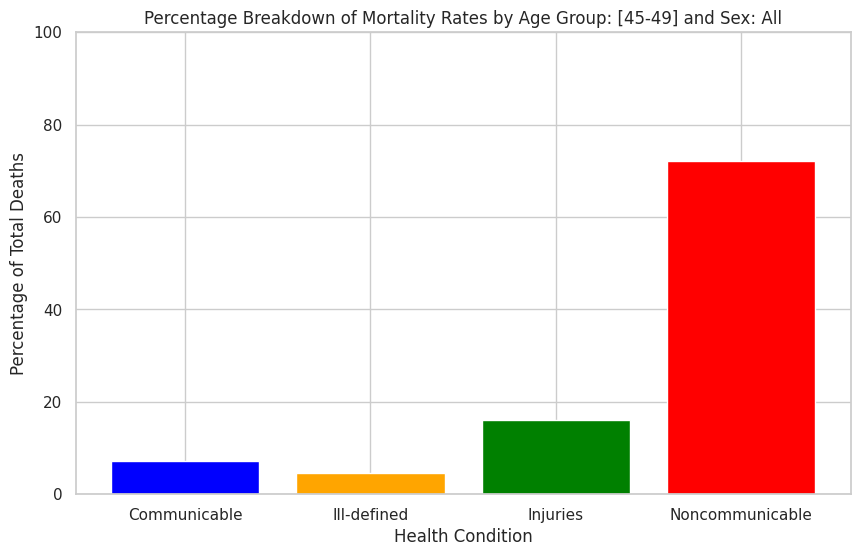

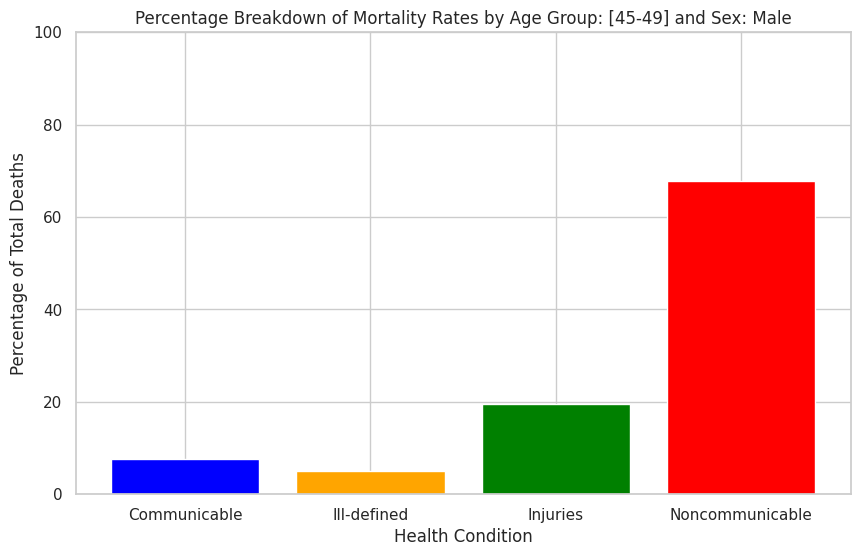

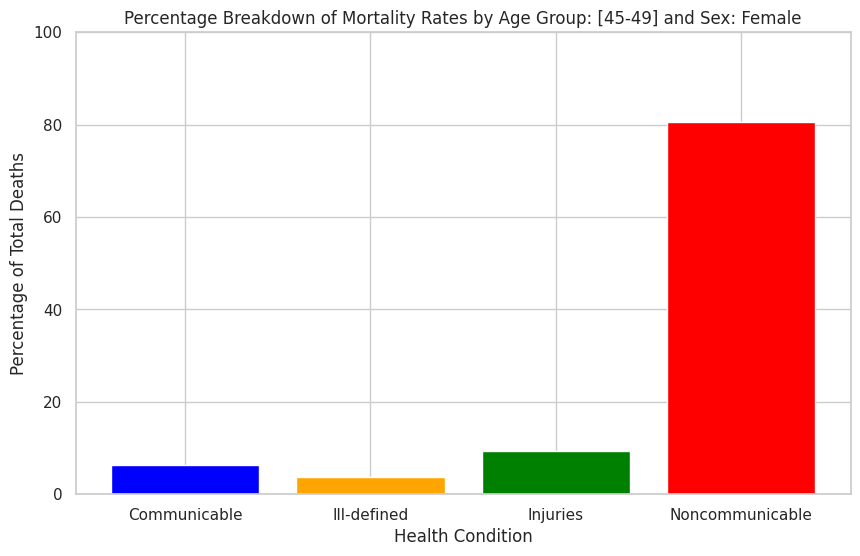

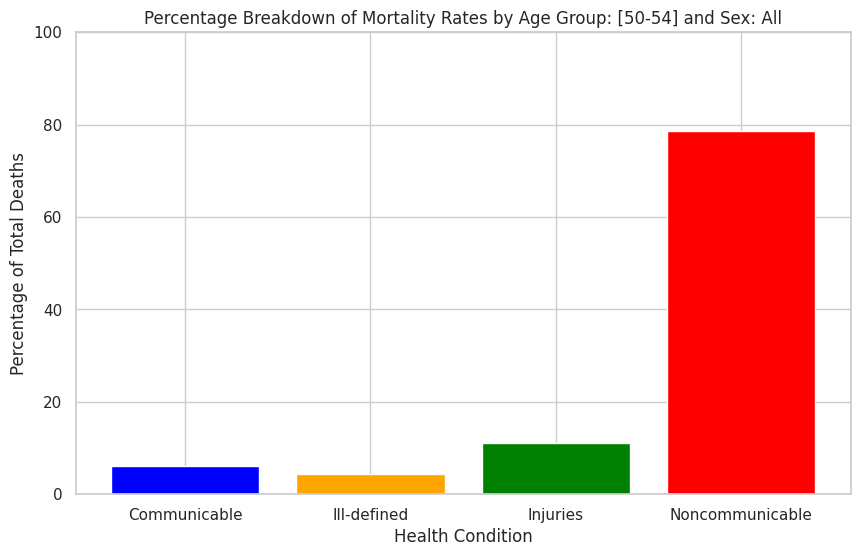

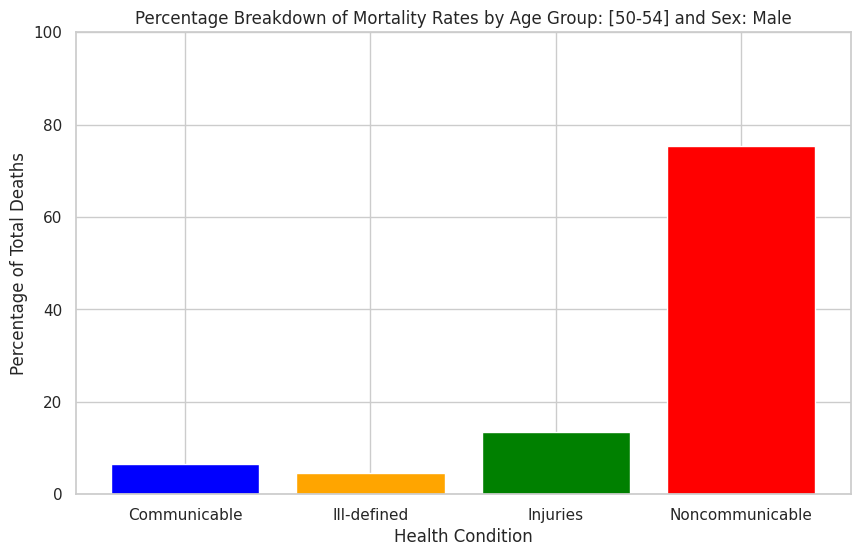

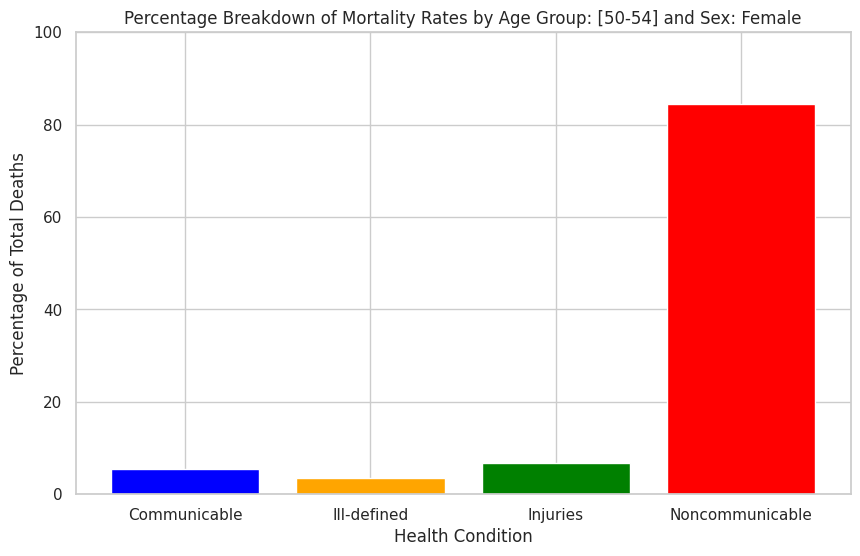

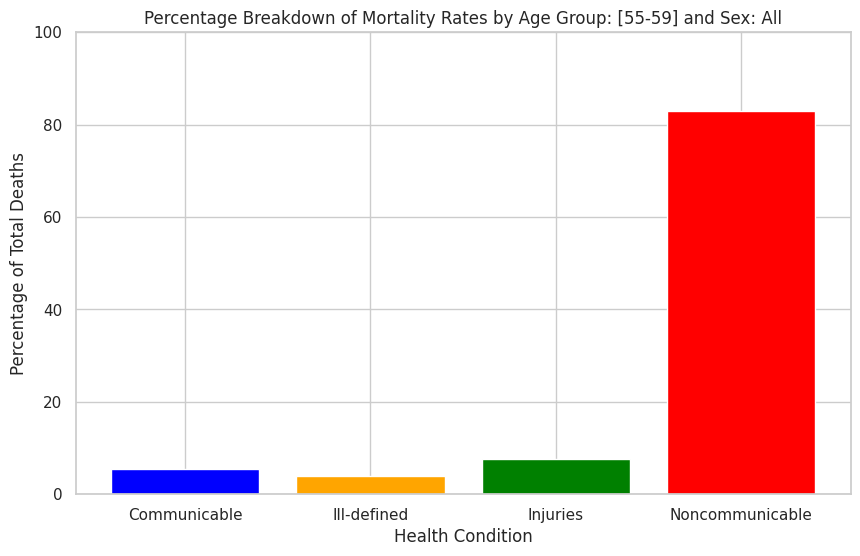

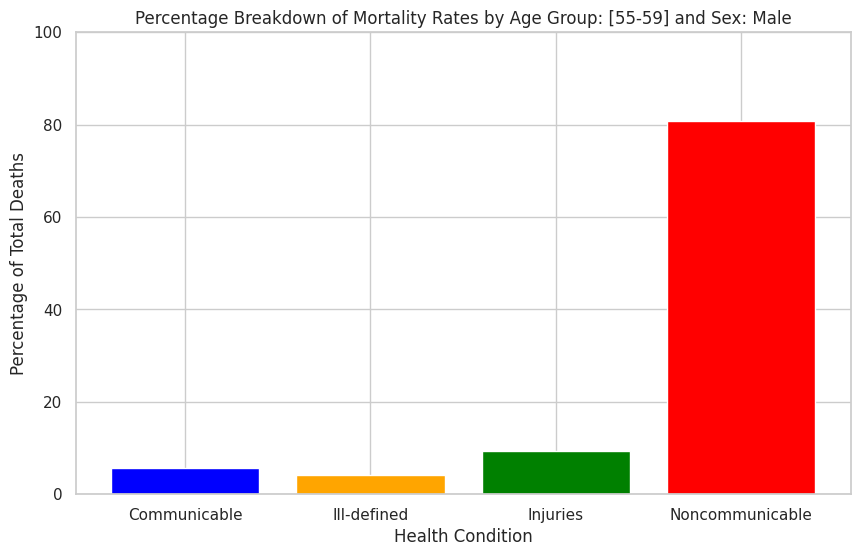

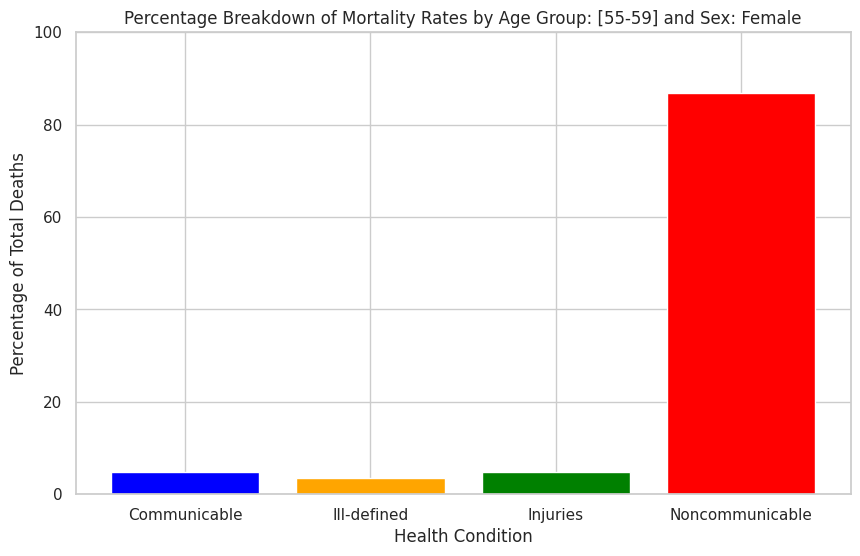

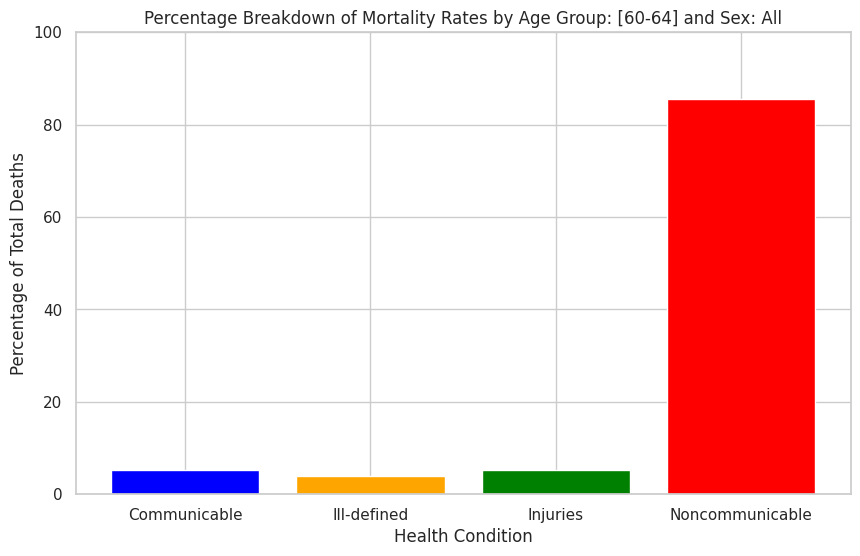

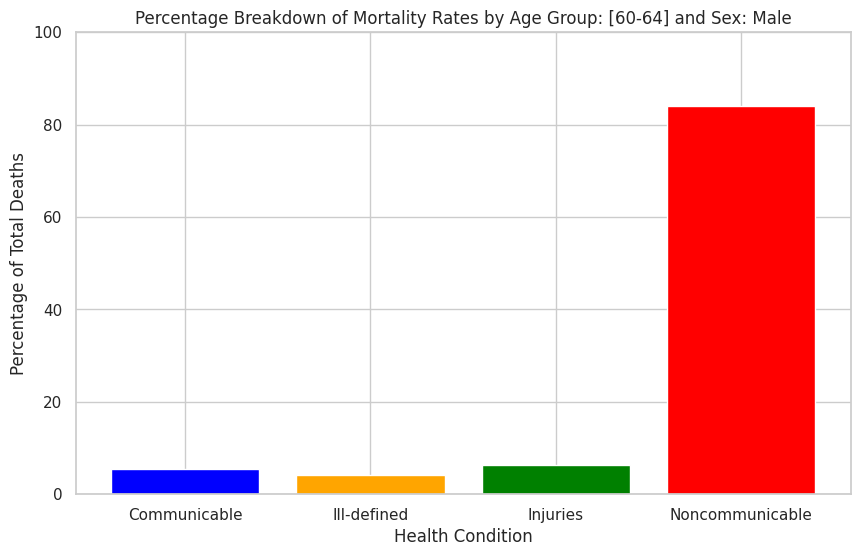

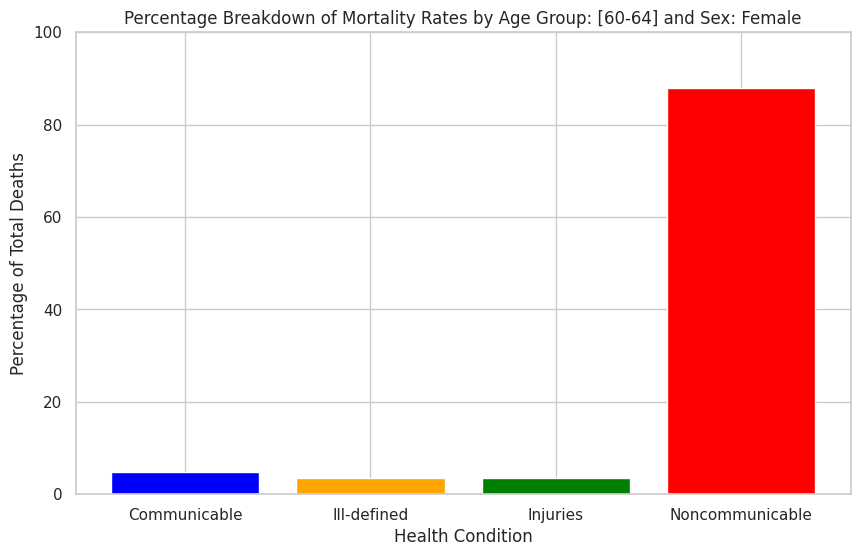

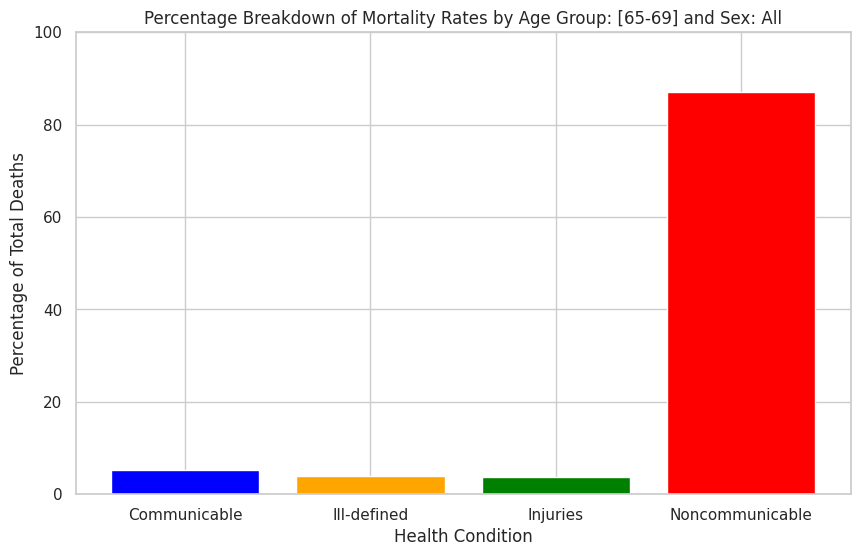

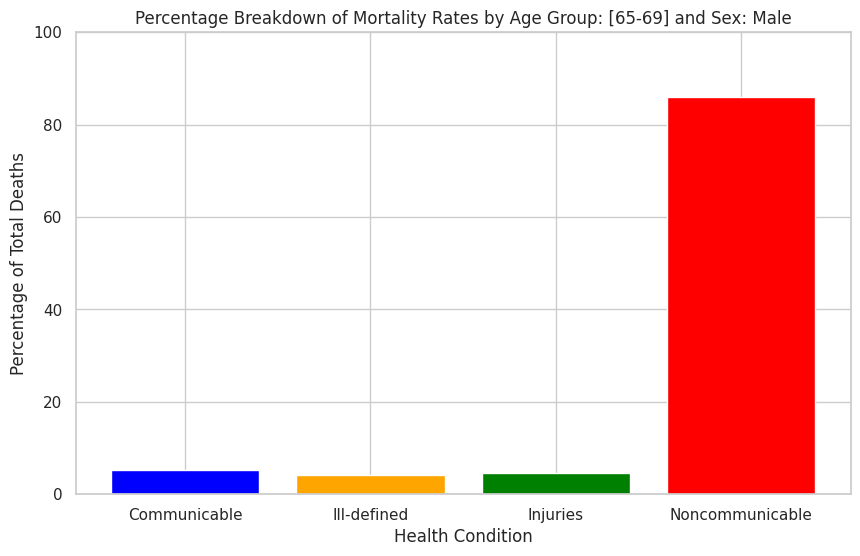

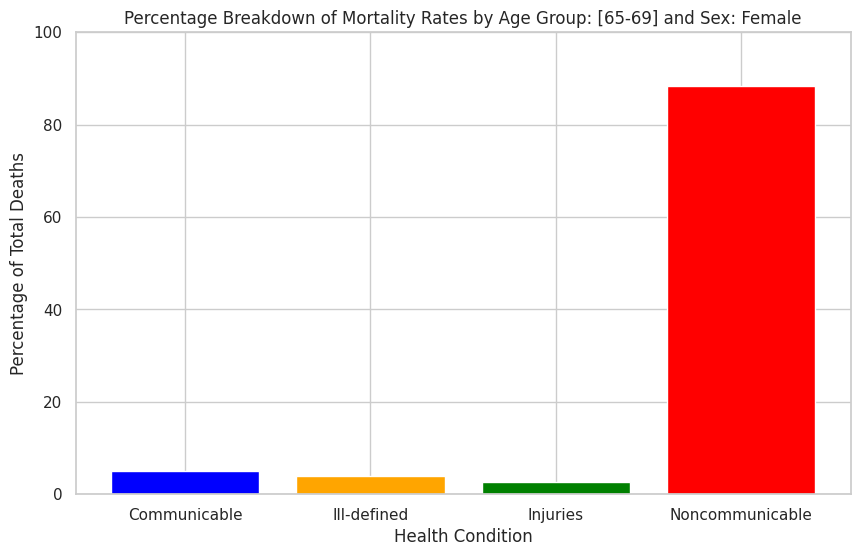

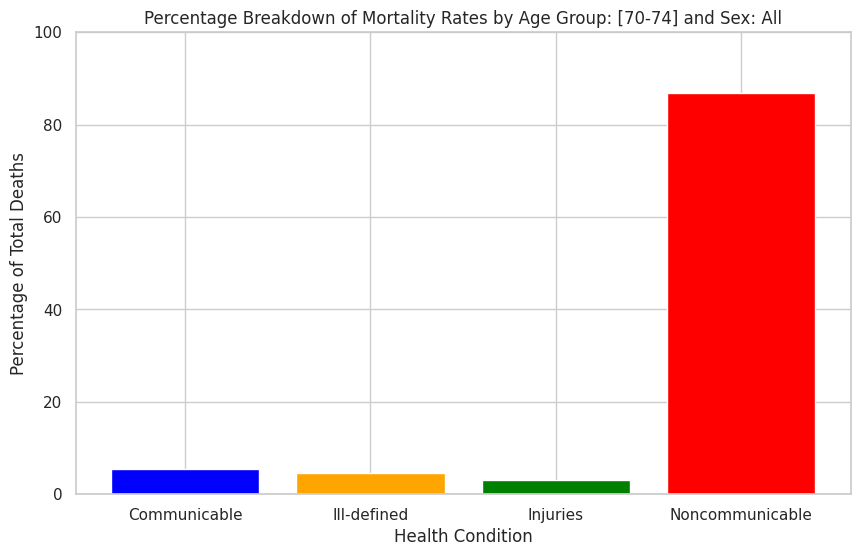

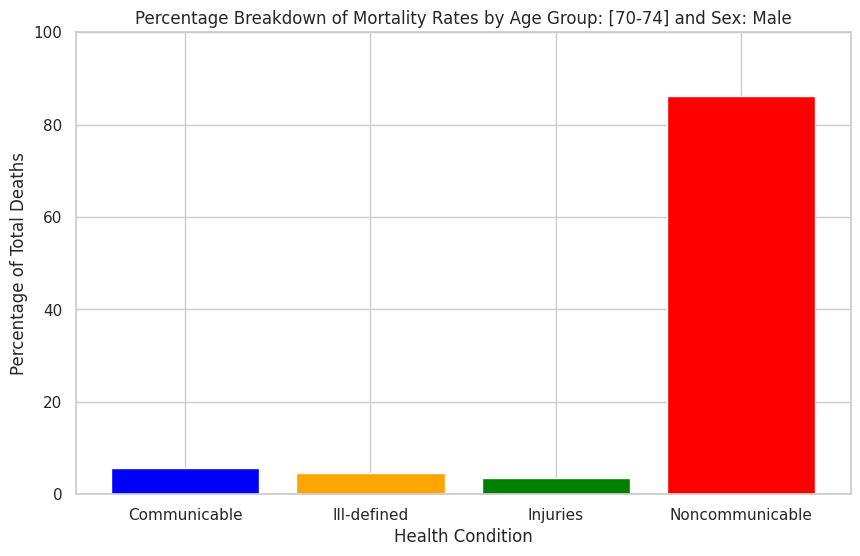

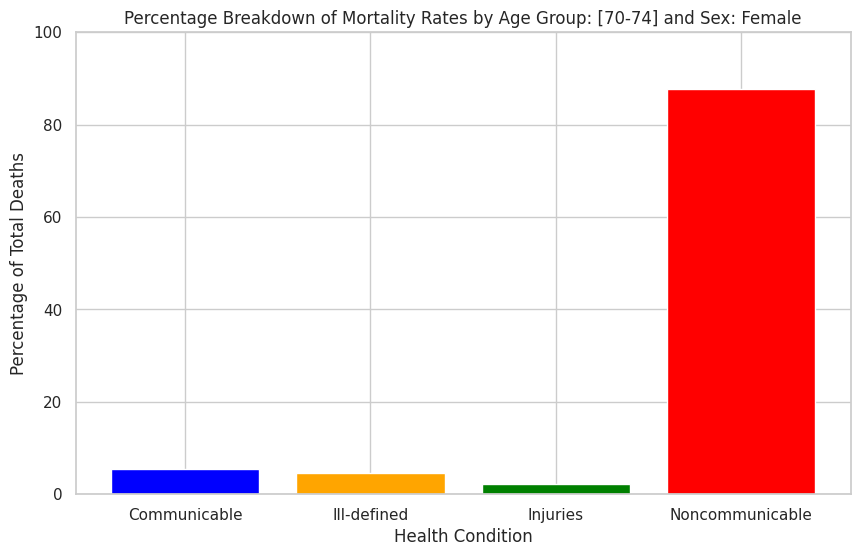

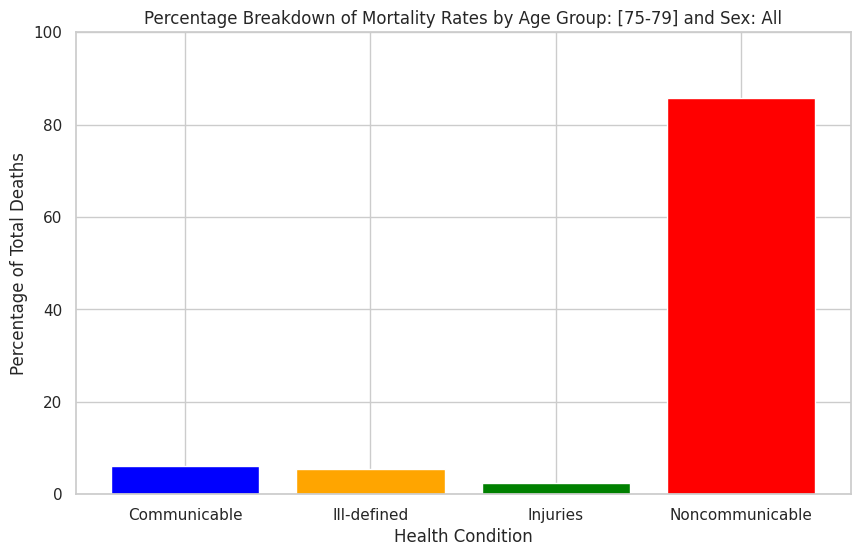

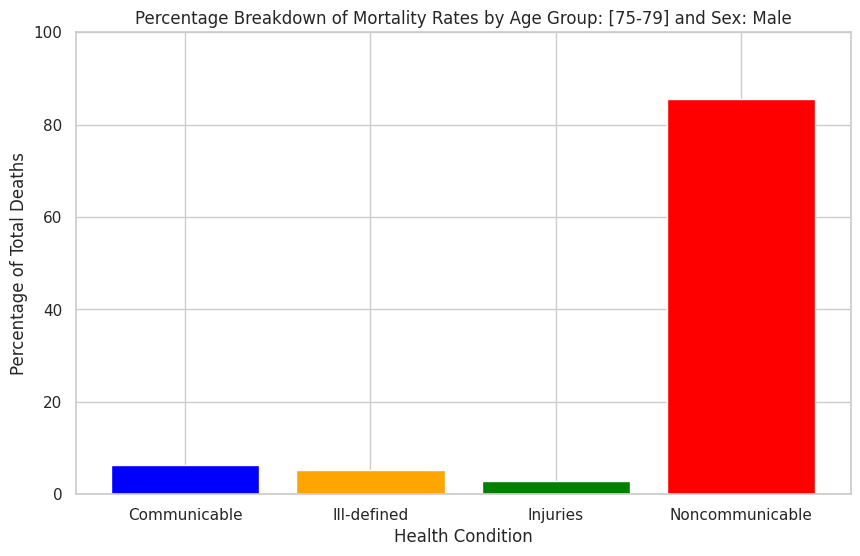

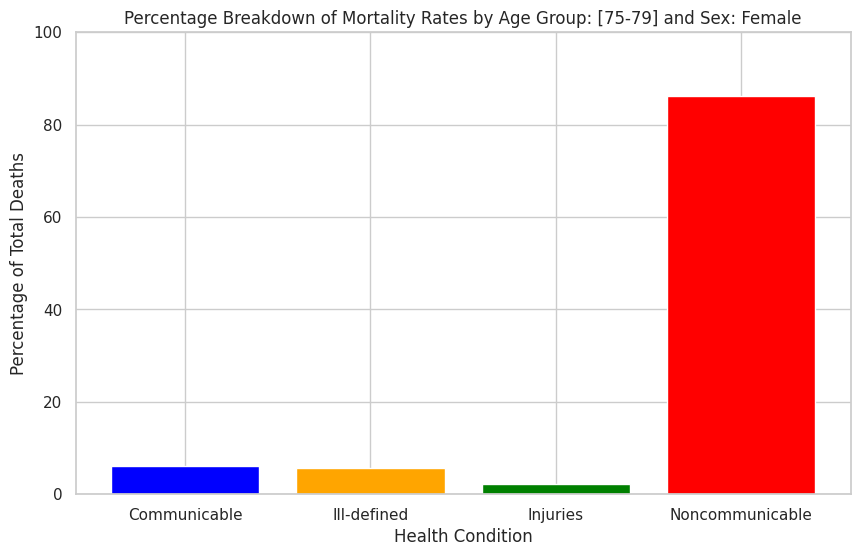

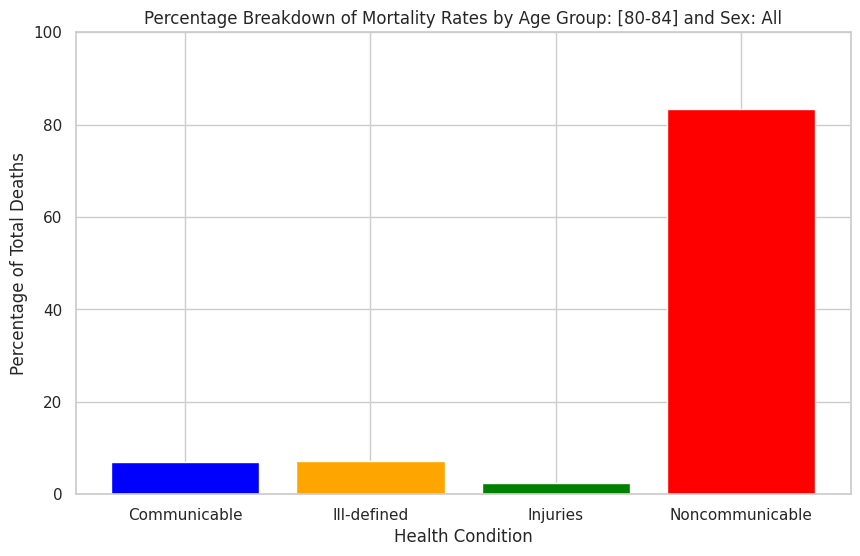

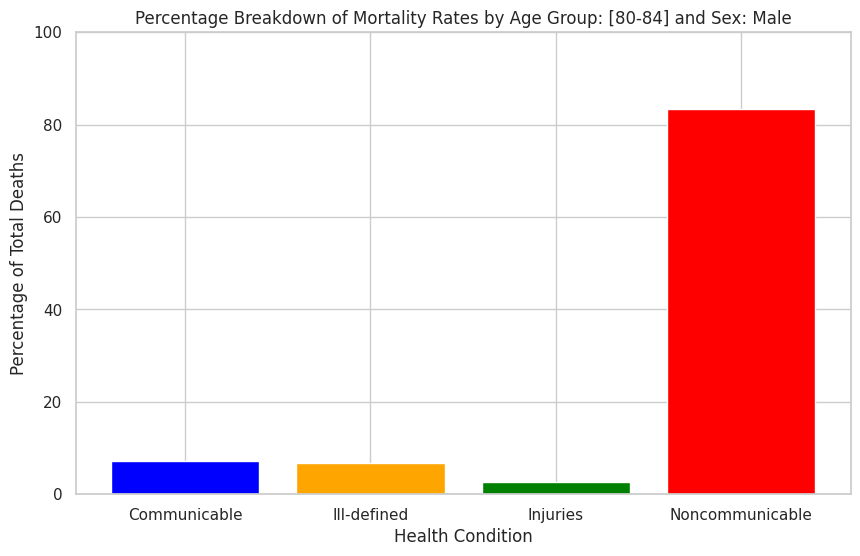

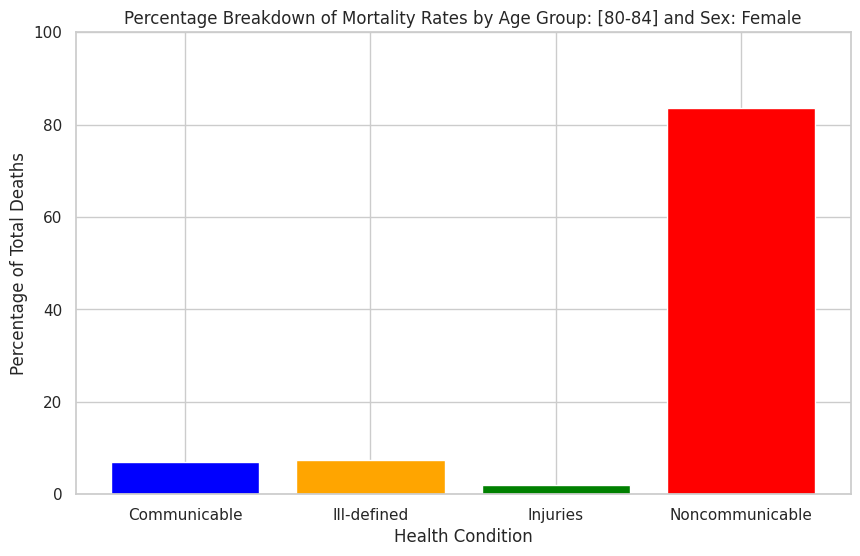

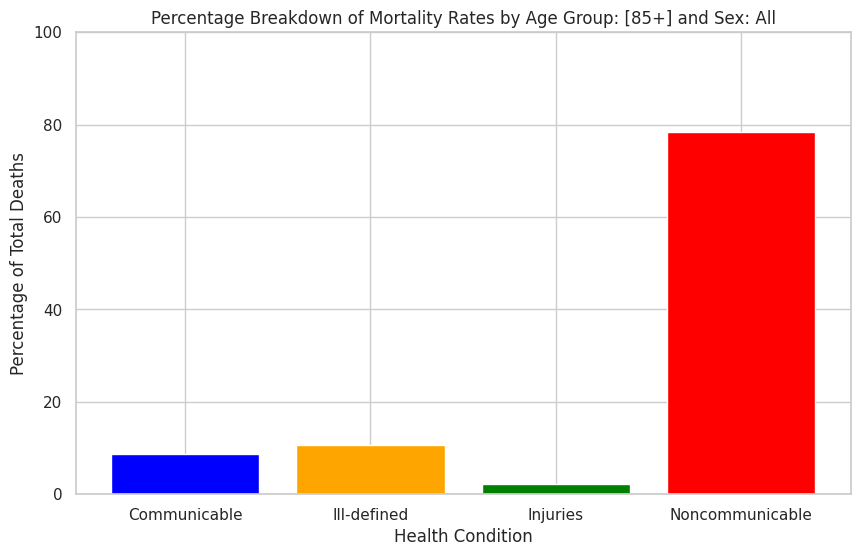

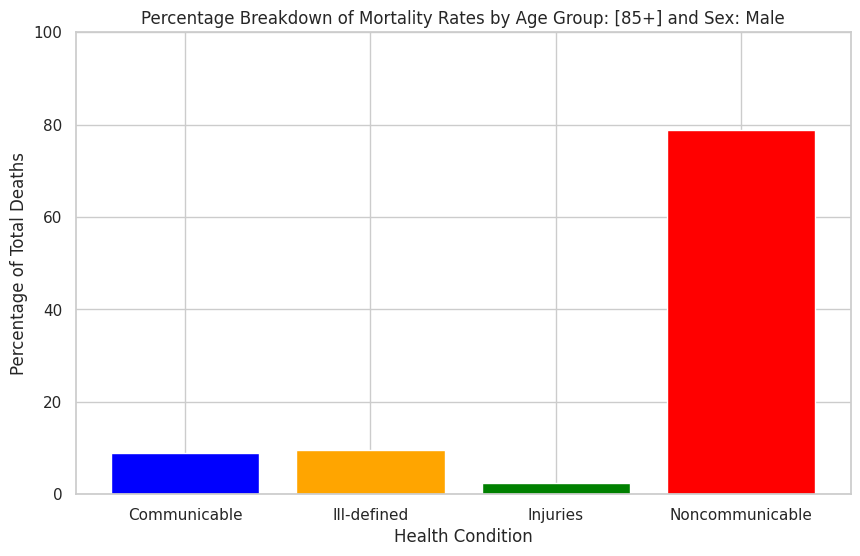

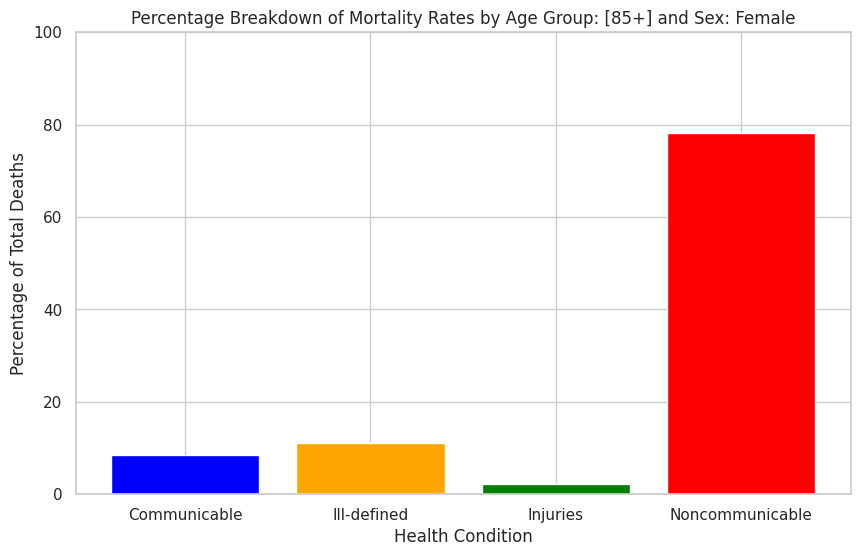

In [ ]:
for age_group in merged_deaths_df['Age Group'].unique():
    for sex in merged_deaths_df['Sex'].unique():
        plot_percentage_breakdown(merged_deaths_df, age_group, sex)
        plt.show()

<ipython-input-23-cce66d170ef0>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


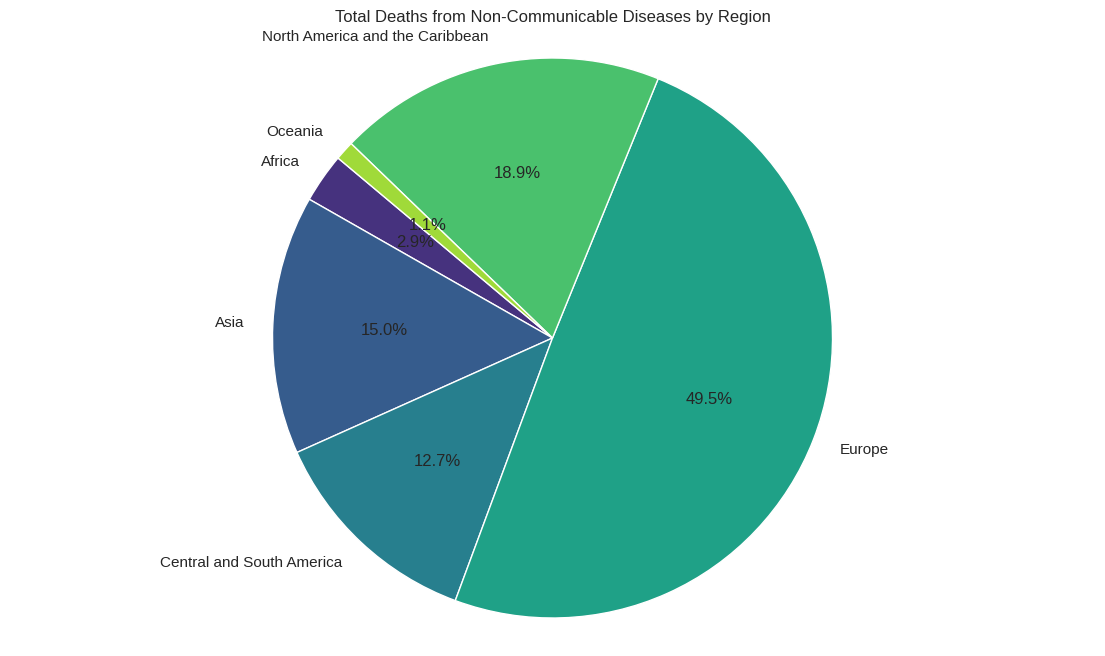

In [ ]:
# Filter the merged data for non-communicable diseases
noncom_deaths_data = merged_deaths_df[['Region Name', 'Year', 'Number_noncom']]

# Group by Region Name and sum the number of deaths
region_noncom_deaths = noncom_deaths_data.groupby('Region Name')['Number_noncom'].sum().reset_index()

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create the pie chart
plt.figure(figsize=(14, 8))
plt.pie(region_noncom_deaths['Number_noncom'], labels=region_noncom_deaths['Region Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(region_noncom_deaths)))

# Customize the plot
plt.title('Total Deaths from Non-Communicable Diseases by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


<ipython-input-27-c725e85df5ae>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


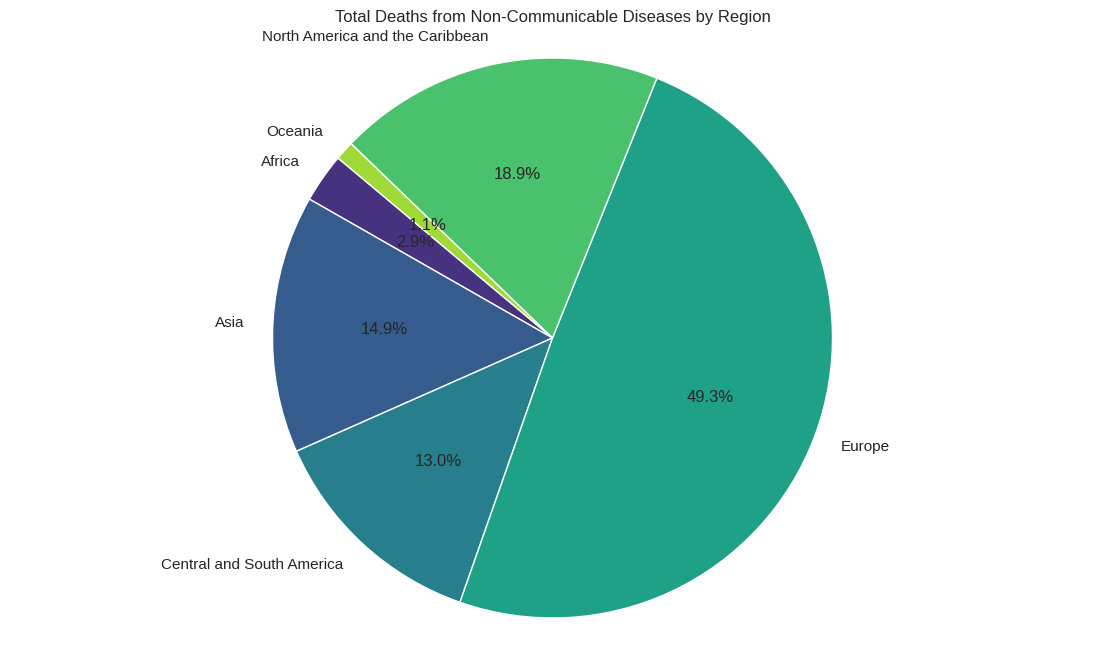

In [ ]:
# Filter the merged data for non-communicable diseases
noncom_deaths_data = noncom_deaths[['Region Name', 'Year', 'Number']]

# Group by Region Name and sum the number of deaths
region_noncom_deaths = noncom_deaths_data.groupby('Region Name')['Number'].sum().reset_index()

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create the pie chart
plt.figure(figsize=(14, 8))
plt.pie(region_noncom_deaths['Number'], labels=region_noncom_deaths['Region Name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(region_noncom_deaths)))

# Customize the plot
plt.title('Total Deaths from Non-Communicable Diseases by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Number_com ~ '
                data=)fit()

anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
                         vwarnings.filterwarnings("ignore")

# Filter rows where Sex is "All" and Age group is "[All]"
filtered_data = merged_deaths_df[(merged_deaths_df['Sex'] == 'All') & (merged_deaths_df['Age Group'] == '[All]')]

# Group by Region Name and Year, then sum the Number of deaths
grouped_data = filtered_data.groupby(['Region Name', 'Year'])['Number'].sum().reset_index()

# Prepare a dictionary to store forecasts for each region
forecasts = {}

# Forecast for each region
for region in grouped_data['Region Name'].unique():
    # Filter data for the current region
    region_data = grouped_data[grouped_data['Region Name'] == region]

    # Set the 'Year' as index (required for time series)
    region_data.set_index('Year', inplace=True)

    # Fit the ARIMA model (you may need to adjust the order (p, d, q))
    model = ARIMA(region_data['Number'], order=(5, 1, 0))  # Example order, adjust as needed
    model_fit = model.fit()

    # Forecast the next 5 years
    forecast = model_fit.forecast(steps=5)

    # Store the forecast
    forecasts[region] = forecast


In [ ]:
# Extend the grouped_data DataFrame with forecasts
for region, forecast in forecasts.items():
    # Create a DataFrame for the forecast
    forecast_df = pd.DataFrame({'Year': range(grouped_data['Year'].max() + 1, grouped_data['Year'].max() + 6),
                                'Number': forecast,
                                'Region Name': region})
    # Append the forecast to the original data
    grouped_data = pd.concat([grouped_data, forecast_df], ignore_index=True)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='Year', y='Number', hue='Region Name', marker='o')

# Customize the plot
plt.title('Total Deaths for All Sex and All Age Groups Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Region Name')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import scipy.stats as stats